Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

Suicide is a complex issue and therefore suicide prevention efforts require coordination and collaboration among multiple sectors of society, including the health sector and other sectors such as education, labour, agriculture, business, justice, law, defense, politics, and the media. These efforts must be comprehensive and integrated as no single approach alone can make an impact on an issue as complex as suicide.


https://www.kaggle.com/datasets/twinkle0705/mental-health-and-suicide-rates/data


Problem Statement:
Develop a comprehensive suicide prevention strategy by analyzing global suicide statistics to identify key risk factors, vulnerable populations, and effective intervention approaches.

Data Scientist's Required Tasks:
1. Data Exploration
- Analyze demographic patterns in suicide rates
- Identify high-risk groups and regions
- Uncover correlations between socioeconomic factors and suicide risk

2. Predictive Modeling
- Build predictive models to:
  * Identify individuals at high suicide risk
  * Forecast suicide trends
  * Evaluate potential intervention effectiveness

3. Risk Factor Analysis
- Investigate statistical relationships between:
  * Mental health indicators
  * Socioeconomic conditions
  * Cultural/regional characteristics
  * Individual risk factors

4. Intervention Strategy Development
- Use data insights to:
  * Design targeted prevention programs
  * Recommend resource allocation
  * Create early warning systems
  * Develop personalized risk assessment tools

5. Ethical Considerations
- Ensure data privacy
- Avoid stigmatization
- Develop sensitive, evidence-based recommendations

Key Objective: Transform statistical data into actionable strategies that can potentially save lives by providing targeted, data-driven suicide prevention approaches.

In [1]:
# Importing all relevant packages to the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  # Import warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

%matplotlib inline

In [2]:
# Loading all project datasets
df_age_standardized = pd.read_csv("datasets/Age-standardized suicide rates.csv")
df_crude = pd.read_csv("datasets/Crude suicide rates.csv")
df_facilities = pd.read_csv("datasets/Facilities.csv")
df_human = pd.read_csv("datasets/Human Resources.csv")

In [3]:
df_age_standardized.info() # Checking the summary info of the Age-standardized suicide rates dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  549 non-null    object 
 1   Sex      549 non-null    object 
 2   2016     549 non-null    float64
 3   2015     549 non-null    float64
 4   2010     549 non-null    float64
 5   2000     549 non-null    float64
dtypes: float64(4), object(2)
memory usage: 25.9+ KB


In [4]:
df_age_standardized.isna().sum().sum() # Checking for missing values in all columns of the dataset

0

In [5]:
df_crude.info() # Checking the summary info of the Crude suicide rates dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    549 non-null    object 
 1   Sex        549 non-null    object 
 2    80_above  549 non-null    float64
 3    70to79    549 non-null    float64
 4    60to69    549 non-null    float64
 5    50to59    549 non-null    float64
 6    40to49    549 non-null    float64
 7    30to39    549 non-null    float64
 8    20to29    549 non-null    float64
 9    10to19    549 non-null    float64
dtypes: float64(8), object(2)
memory usage: 43.0+ KB


In [6]:
df_crude.isna().sum().sum() # Checking for missing values in all columns of the dataset

0

In [7]:
concat_df = pd.concat([df_age_standardized, df_crude], axis=1) # Concatenating both Age-standardized suicide rates and Crude Suicide rates datasets 

In [8]:
concat_df

Country          Sex  2016  2015  2010  2000      Country  \
0    Afghanistan   Both sexes   6.4   6.6   7.4   8.1  Afghanistan   
1    Afghanistan         Male  10.6  10.9  12.5  14.3  Afghanistan   
2    Afghanistan       Female   2.1   2.1   2.1   1.7  Afghanistan   
3        Albania   Both sexes   5.6   5.3   7.7   5.8      Albania   
4        Albania         Male   7.0   6.7   9.5   8.2      Albania   
..           ...          ...   ...   ...   ...   ...          ...   
544       Zambia         Male  17.5  17.4  17.9  21.9       Zambia   
545       Zambia       Female   6.2   6.1   6.2   7.5       Zambia   
546     Zimbabwe   Both sexes  19.1  18.9  20.6  21.7     Zimbabwe   
547     Zimbabwe         Male  29.1  28.7  32.3  35.5     Zimbabwe   
548     Zimbabwe       Female  11.1  11.1  11.1   9.8     Zimbabwe   

             Sex   80_above   70to79   60to69    50to59    40to49   30to39  \
0     Both sexes       42.0     11.0       5.5       5.6      6.6      9.2   
1           Male       70.4     20.9       9.8       9.3     10.5     15.1   
2         Female       20.1      2.3       1.4       1.6      2.3      2.7   
3     Both sexes       16.3      8.3       6.0       7.8      9.1      6.1   
4           Male       23.2     11.9       8.1      11.4     13.5      8.8   
..           ...        ...      ...       ...       ...      ...      ...   
544         Male      152.1     79.0      38.7      27.3     17.0     13.3   
545       Female       31.2     26.4      16.0      11.2      6.9      4.6   
546   Both sexes      205.7     81.5      41.3      29.4     19.2     13.7   
547         Male      285.0    111.5      62.8      47.0     30.1     22.8   
548       Female      152.4     59.4      26.4      16.0      9.4      5.5   

      20to29   10to19  
0       10.2      3.1  
1       16.3      4.8  
2        3.5      1.2  
3        6.5      5.0  
4        6.3      3.1  
..       ...      ...  
544     12.3      3.9  
545      4.2      1.6  
546     11.3      4.6  
547     19.1      6.4  
548      3.8      2.7  

[549 rows x 16 columns]

In [9]:
# Removing duplicate columns From concatenated dataset
concat_df = concat_df.loc[:, ~concat_df.columns.duplicated()]

In [10]:
concat_df

Country          Sex  2016  2015  2010  2000   80_above   70to79  \
0    Afghanistan   Both sexes   6.4   6.6   7.4   8.1       42.0     11.0   
1    Afghanistan         Male  10.6  10.9  12.5  14.3       70.4     20.9   
2    Afghanistan       Female   2.1   2.1   2.1   1.7       20.1      2.3   
3        Albania   Both sexes   5.6   5.3   7.7   5.8       16.3      8.3   
4        Albania         Male   7.0   6.7   9.5   8.2       23.2     11.9   
..           ...          ...   ...   ...   ...   ...        ...      ...   
544       Zambia         Male  17.5  17.4  17.9  21.9      152.1     79.0   
545       Zambia       Female   6.2   6.1   6.2   7.5       31.2     26.4   
546     Zimbabwe   Both sexes  19.1  18.9  20.6  21.7      205.7     81.5   
547     Zimbabwe         Male  29.1  28.7  32.3  35.5      285.0    111.5   
548     Zimbabwe       Female  11.1  11.1  11.1   9.8      152.4     59.4   

      60to69    50to59    40to49   30to39   20to29   10to19  
0         5.5       5.6      6.6      9.2     10.2      3.1  
1         9.8       9.3     10.5     15.1     16.3      4.8  
2         1.4       1.6      2.3      2.7      3.5      1.2  
3         6.0       7.8      9.1      6.1      6.5      5.0  
4         8.1      11.4     13.5      8.8      6.3      3.1  
..        ...       ...      ...      ...      ...      ...  
544      38.7      27.3     17.0     13.3     12.3      3.9  
545      16.0      11.2      6.9      4.6      4.2      1.6  
546      41.3      29.4     19.2     13.7     11.3      4.6  
547      62.8      47.0     30.1     22.8     19.1      6.4  
548      26.4      16.0      9.4      5.5      3.8      2.7  

[549 rows x 14 columns]

In [11]:
df_age = concat_df.copy() # Copying the Concat_df into a df_age dataset

In [12]:
df_age

Country          Sex  2016  2015  2010  2000   80_above   70to79  \
0    Afghanistan   Both sexes   6.4   6.6   7.4   8.1       42.0     11.0   
1    Afghanistan         Male  10.6  10.9  12.5  14.3       70.4     20.9   
2    Afghanistan       Female   2.1   2.1   2.1   1.7       20.1      2.3   
3        Albania   Both sexes   5.6   5.3   7.7   5.8       16.3      8.3   
4        Albania         Male   7.0   6.7   9.5   8.2       23.2     11.9   
..           ...          ...   ...   ...   ...   ...        ...      ...   
544       Zambia         Male  17.5  17.4  17.9  21.9      152.1     79.0   
545       Zambia       Female   6.2   6.1   6.2   7.5       31.2     26.4   
546     Zimbabwe   Both sexes  19.1  18.9  20.6  21.7      205.7     81.5   
547     Zimbabwe         Male  29.1  28.7  32.3  35.5      285.0    111.5   
548     Zimbabwe       Female  11.1  11.1  11.1   9.8      152.4     59.4   

      60to69    50to59    40to49   30to39   20to29   10to19  
0         5.5       5.6      6.6      9.2     10.2      3.1  
1         9.8       9.3     10.5     15.1     16.3      4.8  
2         1.4       1.6      2.3      2.7      3.5      1.2  
3         6.0       7.8      9.1      6.1      6.5      5.0  
4         8.1      11.4     13.5      8.8      6.3      3.1  
..        ...       ...      ...      ...      ...      ...  
544      38.7      27.3     17.0     13.3     12.3      3.9  
545      16.0      11.2      6.9      4.6      4.2      1.6  
546      41.3      29.4     19.2     13.7     11.3      4.6  
547      62.8      47.0     30.1     22.8     19.1      6.4  
548      26.4      16.0      9.4      5.5      3.8      2.7  

[549 rows x 14 columns]

In [13]:
df_age.info() # Summary info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    549 non-null    object 
 1   Sex        549 non-null    object 
 2   2016       549 non-null    float64
 3   2015       549 non-null    float64
 4   2010       549 non-null    float64
 5   2000       549 non-null    float64
 6    80_above  549 non-null    float64
 7    70to79    549 non-null    float64
 8    60to69    549 non-null    float64
 9    50to59    549 non-null    float64
 10   40to49    549 non-null    float64
 11   30to39    549 non-null    float64
 12   20to29    549 non-null    float64
 13   10to19    549 non-null    float64
dtypes: float64(12), object(2)
memory usage: 60.2+ KB


In [14]:
df_age.columns = df_age.columns.str.strip() # Remove leading and trailing whitespace from column names

In [15]:
df_age.isna().sum().sum() # Checking for missing values in the df_age dataset

0

In [16]:
df_age.columns # Inspecting the columns in the dataset

Index(['Country', 'Sex', '2016', '2015', '2010', '2000', '80_above', '70to79',
       '60to69', '50to59', '40to49', '30to39', '20to29', '10to19'],
      dtype='object')

In [17]:
df_age.describe() # Checking the summary statistics of the df_age dataset

2016        2015        2010        2000    80_above      70to79  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean     9.792532    9.925683   10.544991   12.164117   42.585428   25.936794   
std      7.469341    7.633241    8.620174   10.378318   43.477900   24.795457   
min      0.000000    0.000000    0.000000    0.100000    0.000000    0.000000   
25%      4.300000    4.400000    4.700000    5.100000   13.600000    8.400000   
50%      7.900000    8.100000    8.400000    9.500000   26.600000   17.100000   
75%     13.400000   13.300000   14.100000   16.000000   55.500000   35.800000   
max     48.300000   51.500000   62.300000   85.800000  285.000000  133.700000   

           60to69      50to59      40to49      30to39      20to29      10to19  
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000  
mean    17.439162   14.743352   12.189435   10.895446   10.423315    4.075046  
std     14.315504   12.790041   11.121364   10.148280    9.051273    3.393507  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      6.600000    5.600000    4.800000    4.300000    4.300000    1.700000  
50%     12.900000   11.200000    9.000000    8.000000    7.900000    3.100000  
75%     24.000000   20.000000   16.400000   13.900000   13.500000    5.300000  
max     78.500000   85.400000   86.500000   88.400000   57.400000   24.200000

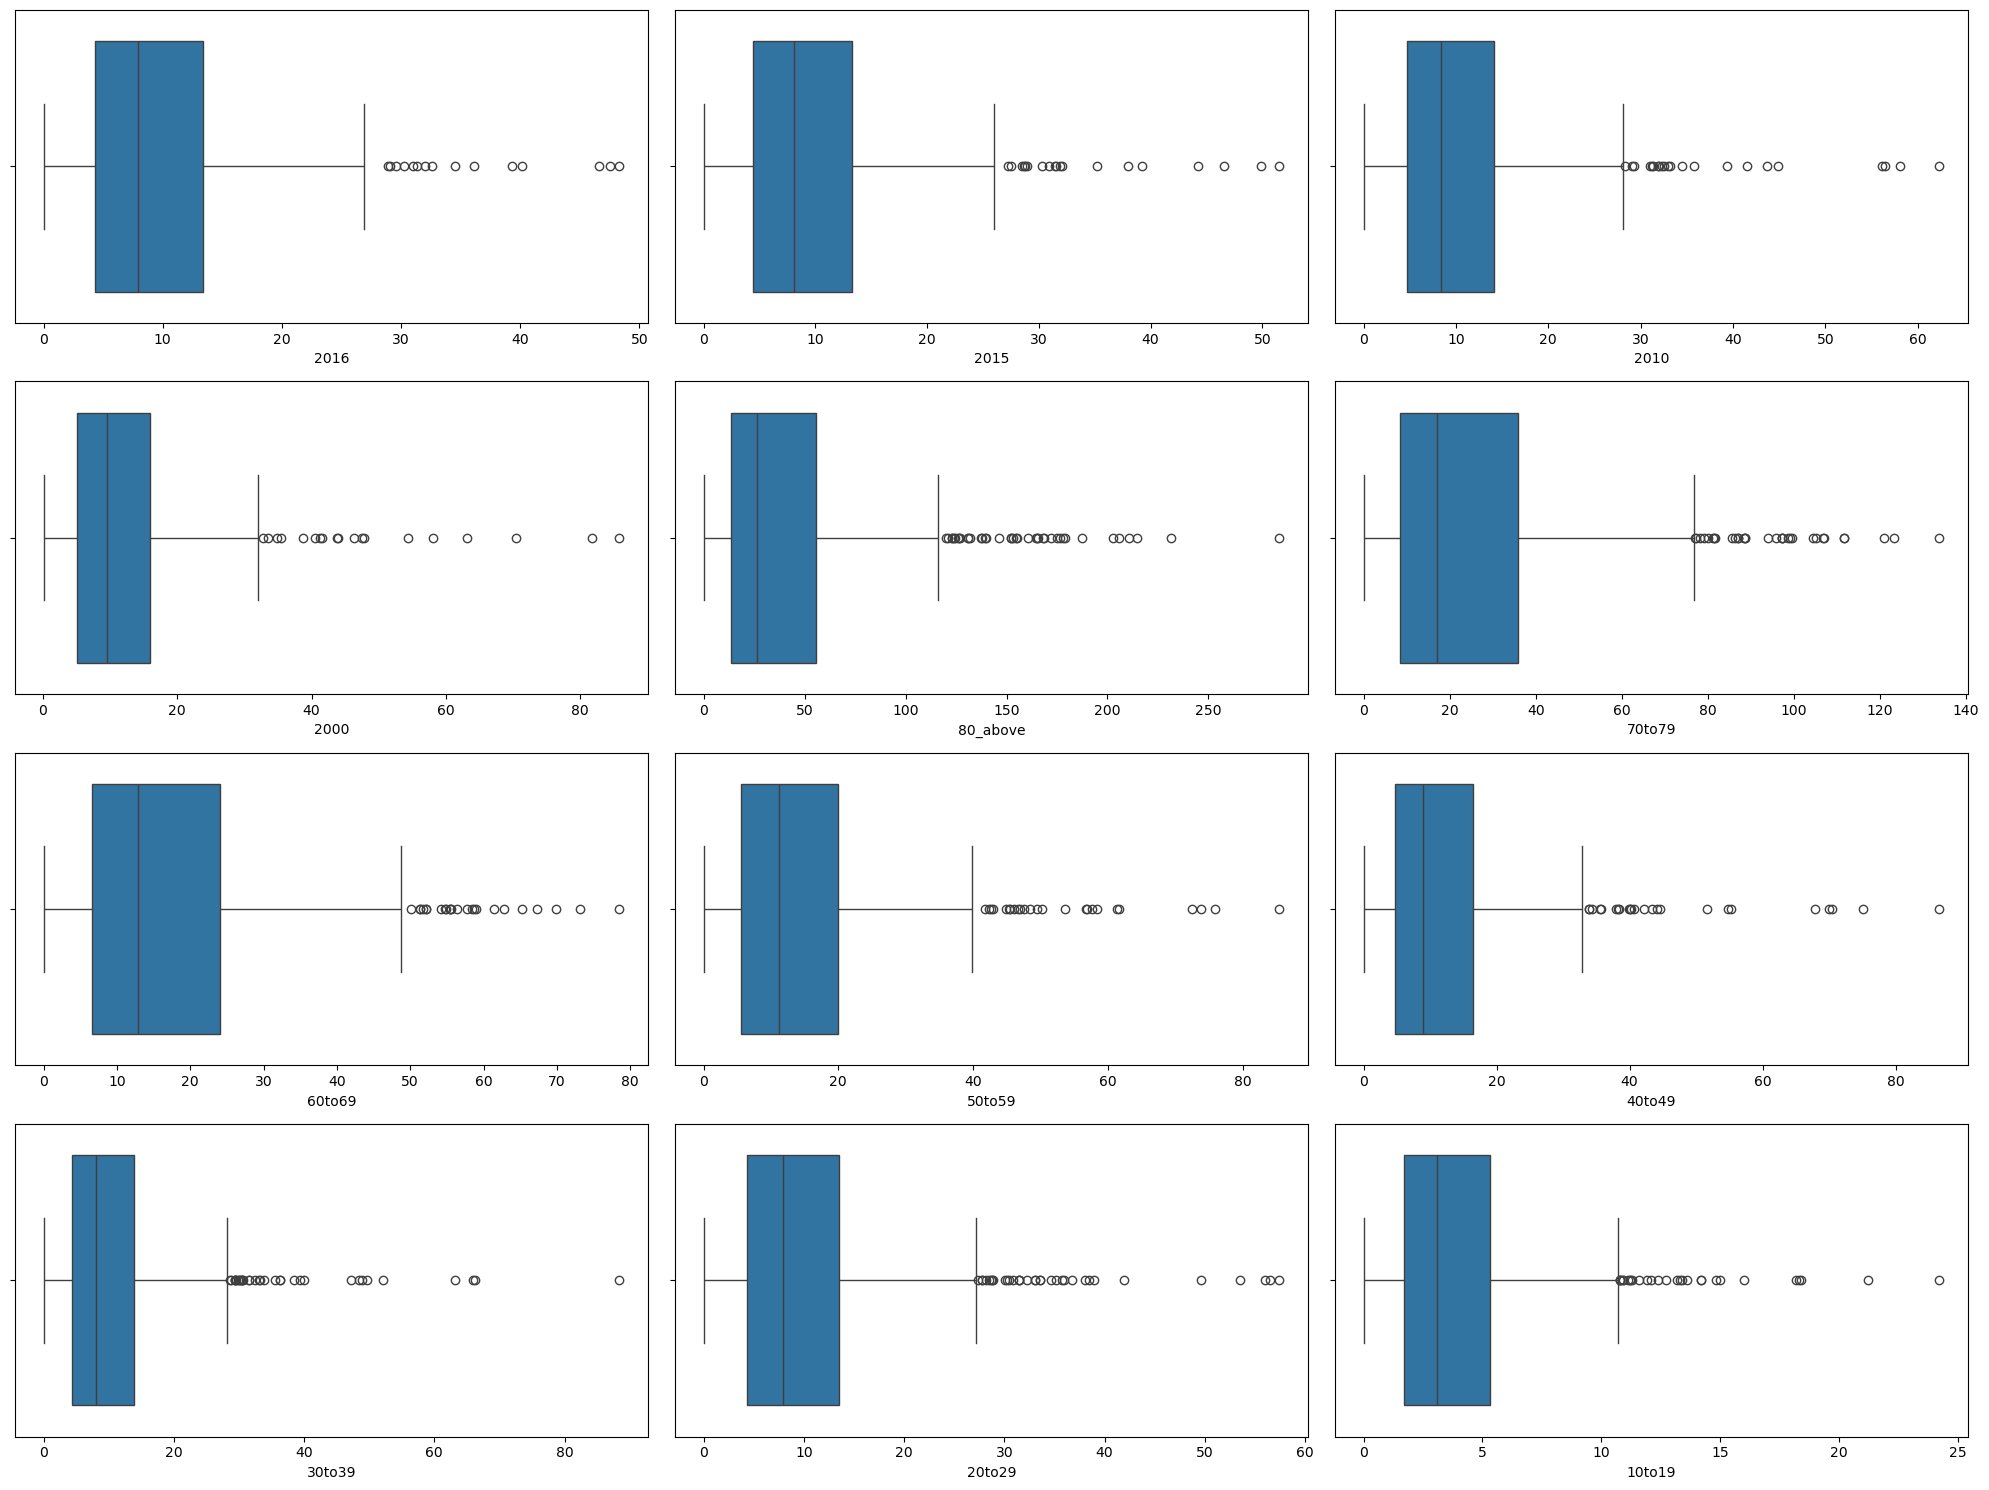

In [18]:
# Visualizing the distribution of df_age

# Selecting numerical columns
numerical_columns = df_age.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15)) # Setting figure size
for i, feature in enumerate(numerical_columns, 1): # Looping through each numerical feature
    plt.subplot(4, 3, i) # Creating a subplot for each feature, arranged in a 4x3 grid
    sns.boxplot(df_age[feature], orient='h') # boxplot for the features distribution
    
plt.tight_layout() # Adjusting subplots to fit neatly into the figure
plt.show() # Displaying the plot

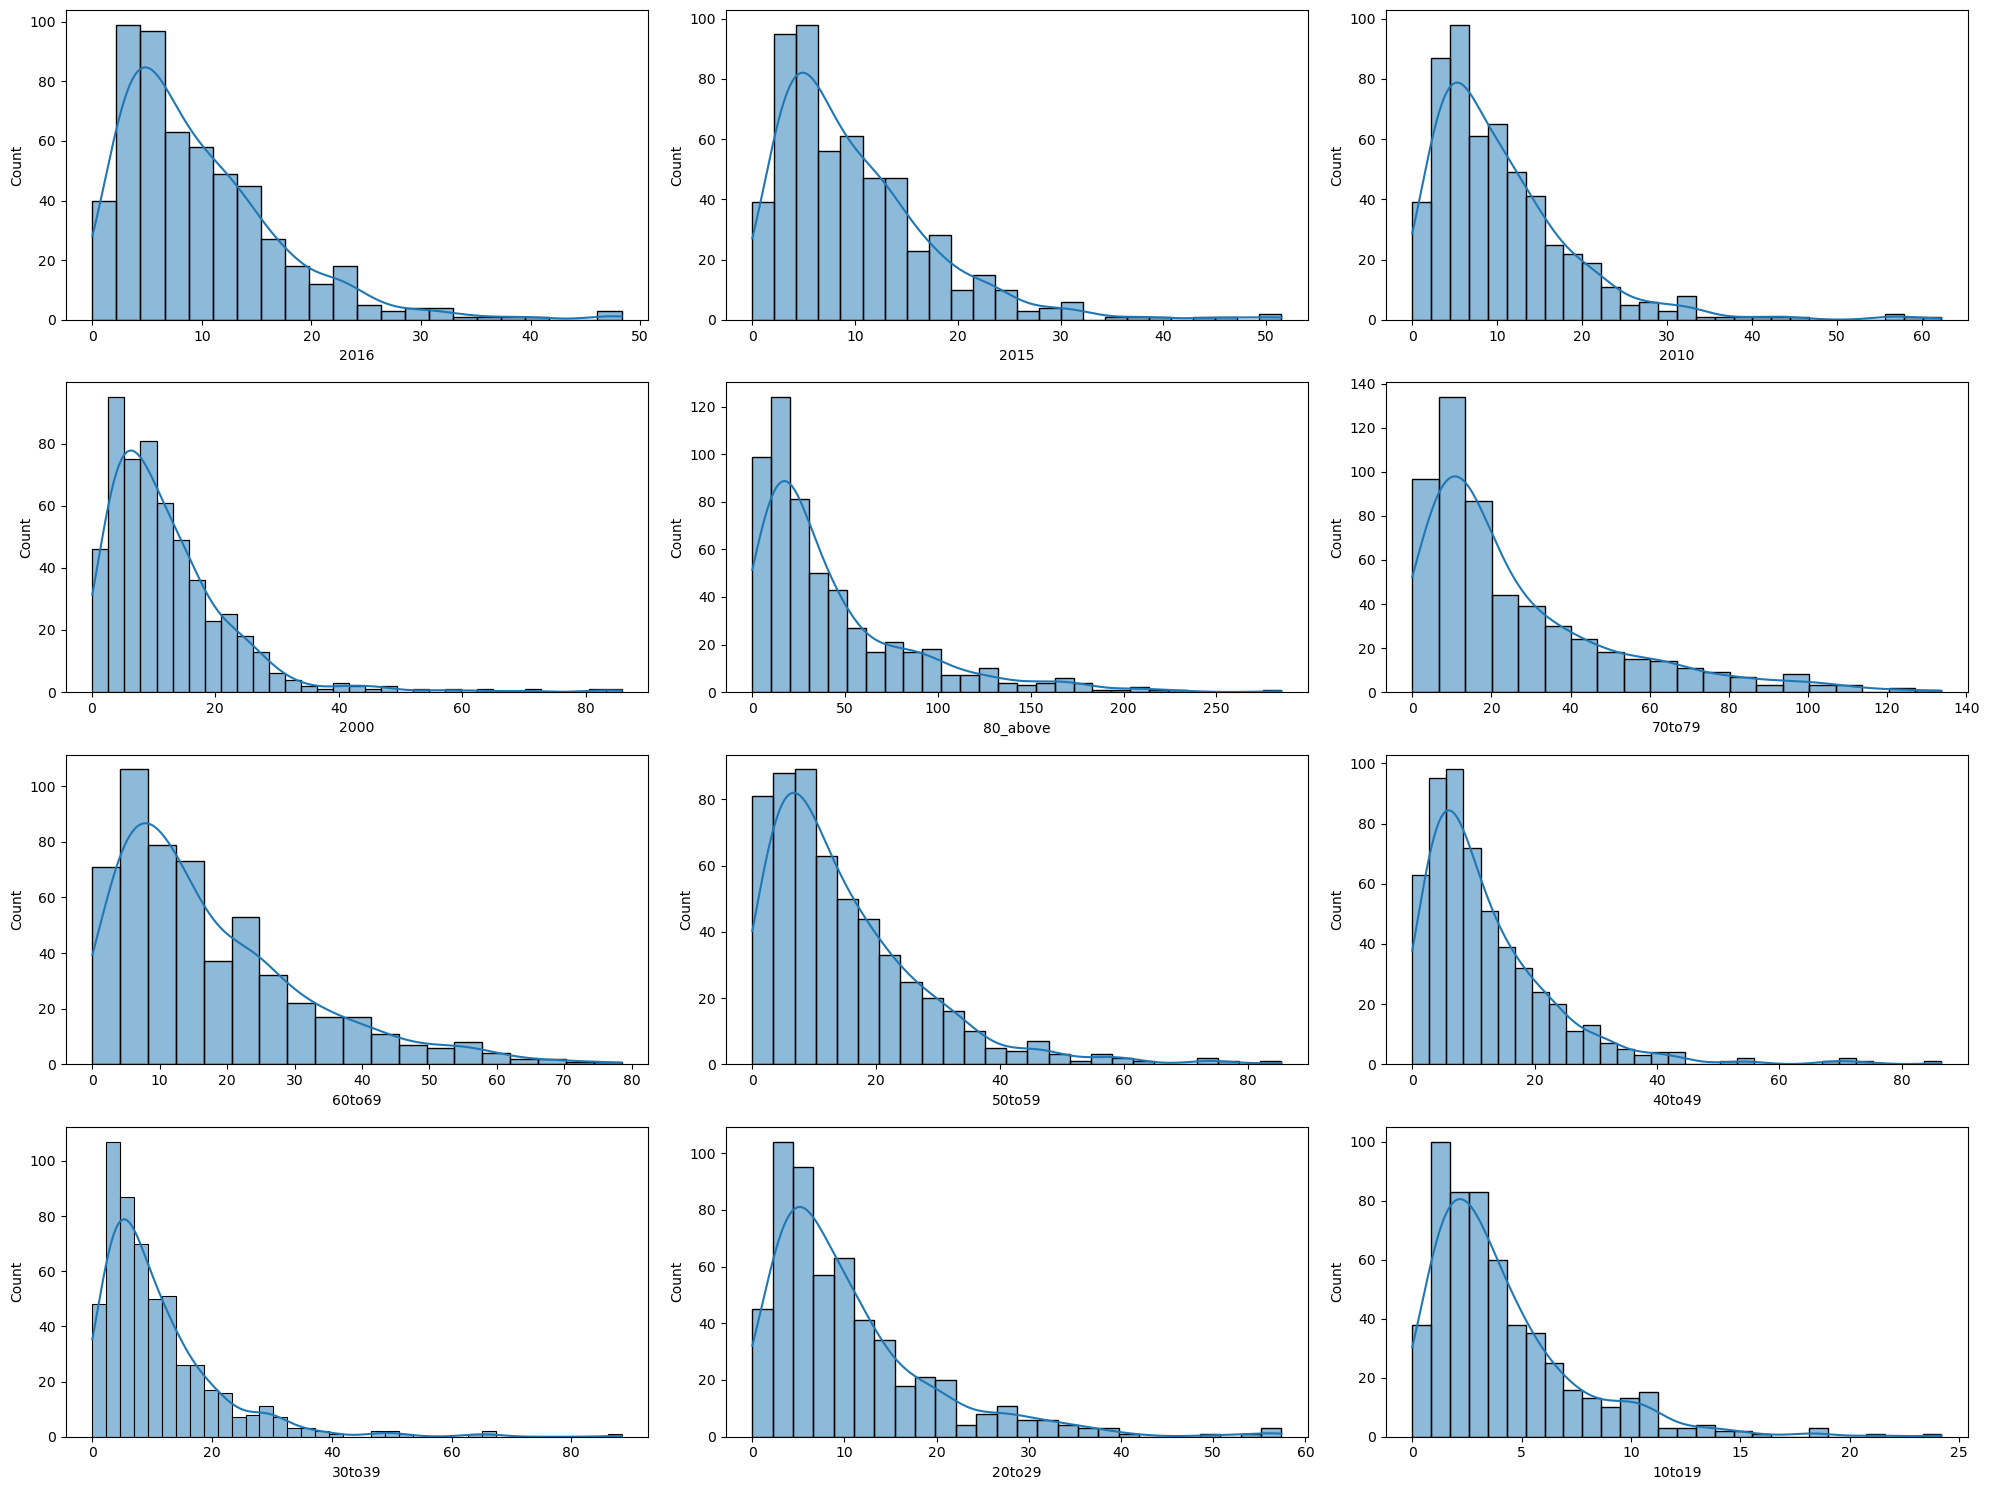

In [19]:
# Visualizing the distribution of df_age

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_columns, 1): # Looping through each numerical feature
    plt.subplot(4, 3, i) # Creating a subplot for each feature, arranged in a 4x3 grid
    sns.histplot(df_age[feature], kde=True) # histplotplot for the features distribution
    
plt.tight_layout() # Adjusting subplots to fit neatly into the figure
plt.show() # Displaying the plot

From the Boxplot and the histplot we can see that they are outliers on the upper bound and the data is positively skewed for all the features.

In [20]:
# Handling Outliers

In [21]:
def identify_and_remove_outliers(df):
    # Create a copy of the dataframe
    df_no_outliers = df.copy()
    
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Dictionary to store outlier counts
    outlier_counts = {}
    
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
        
        # Remove outliers
        df_no_outliers = df_no_outliers[
            (df_no_outliers[column] >= lower_bound) & 
            (df_no_outliers[column] <= upper_bound)
        ]
    
    return df_no_outliers, outlier_counts, df

In [22]:
# Apply the function
df_cleaned, outliers_info, df = identify_and_remove_outliers(df_age)

# Print outlier information
for column, count in outliers_info.items():
    print(f"{column}: {count} outliers removed")

2016: 15 outliers removed
2015: 19 outliers removed
2010: 22 outliers removed
2000: 19 outliers removed
80_above: 40 outliers removed
70to79: 32 outliers removed
60to69: 24 outliers removed
50to59: 25 outliers removed
40to49: 24 outliers removed
30to39: 34 outliers removed
20to29: 34 outliers removed
10to19: 28 outliers removed


In [23]:
df_cleaned.shape

(456, 14)

Over 16% of data was lost after removing the outliers, removing this much data would affect the analysis, so we will be using the original data(df)

In [24]:
df.shape

(549, 14)

In [25]:
#df_age = df_cleaned.copy()
df_age = df.copy()

In [26]:
# Feature Engineering

In [27]:
df_age.head()

Country          Sex  2016  2015  2010  2000  80_above  70to79  60to69  \
0  Afghanistan   Both sexes   6.4   6.6   7.4   8.1      42.0    11.0     5.5   
1  Afghanistan         Male  10.6  10.9  12.5  14.3      70.4    20.9     9.8   
2  Afghanistan       Female   2.1   2.1   2.1   1.7      20.1     2.3     1.4   
3      Albania   Both sexes   5.6   5.3   7.7   5.8      16.3     8.3     6.0   
4      Albania         Male   7.0   6.7   9.5   8.2      23.2    11.9     8.1   

   50to59  40to49  30to39  20to29  10to19  
0     5.6     6.6     9.2    10.2     3.1  
1     9.3    10.5    15.1    16.3     4.8  
2     1.6     2.3     2.7     3.5     1.2  
3     7.8     9.1     6.1     6.5     5.0  
4    11.4    13.5     8.8     6.3     3.1

In [28]:
# Modify column names for age groups
columns_to_modify = ['70to79', '60to69', '50to59', '40to49', '30to39', '20to29', '10to19']

# Create a mapping for column name transformations
column_name_mapping = {
    '70to79': '70-79',
    '60to69': '60-69',
    '50to59': '50-59',
    '40to49': '40-49',
    '30to39': '30-39',
    '20to29': '20-29',
    '10to19': '10-19'
}

# Renaming the columns
df_age.rename(columns=column_name_mapping, inplace=True)

In [29]:
df_age.head()

Country          Sex  2016  2015  2010  2000  80_above  70-79  60-69  \
0  Afghanistan   Both sexes   6.4   6.6   7.4   8.1      42.0   11.0    5.5   
1  Afghanistan         Male  10.6  10.9  12.5  14.3      70.4   20.9    9.8   
2  Afghanistan       Female   2.1   2.1   2.1   1.7      20.1    2.3    1.4   
3      Albania   Both sexes   5.6   5.3   7.7   5.8      16.3    8.3    6.0   
4      Albania         Male   7.0   6.7   9.5   8.2      23.2   11.9    8.1   

   50-59  40-49  30-39  20-29  10-19  
0    5.6    6.6    9.2   10.2    3.1  
1    9.3   10.5   15.1   16.3    4.8  
2    1.6    2.3    2.7    3.5    1.2  
3    7.8    9.1    6.1    6.5    5.0  
4   11.4   13.5    8.8    6.3    3.1

In [30]:
# Exploratory Data Analysis

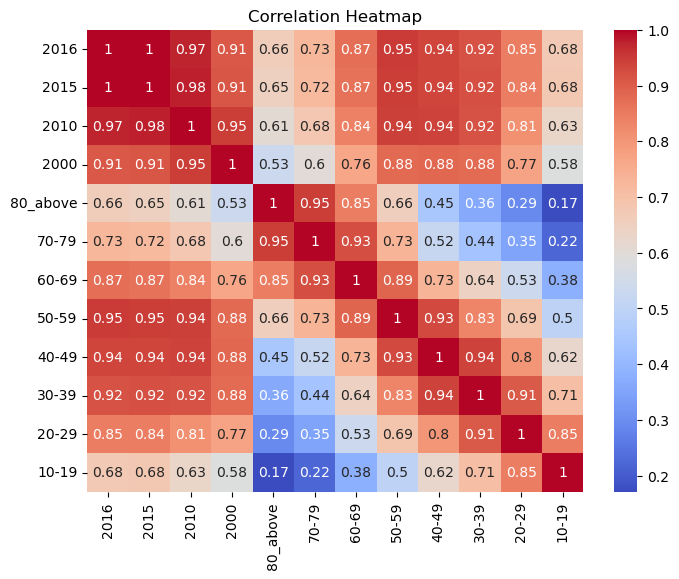

In [31]:
# Correlation Heatmap to see the summary relationship between the features
numerical_columns = df_age.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8, 6))
correlation_matrix = df_age[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Categorical Feature Analysis
categorical_columns = df_age.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(df_age[col].value_counts())


Value Counts for Country:
Afghanistan    3
Netherlands    3
Nicaragua      3
Niger          3
Nigeria        3
              ..
Germany        3
Ghana          3
Greece         3
Grenada        3
Zimbabwe       3
Name: Country, Length: 183, dtype: int64

Value Counts for Sex:
 Both sexes    183
 Male          183
 Female        183
Name: Sex, dtype: int64


In [33]:
df_age[categorical_columns]

Country          Sex
0    Afghanistan   Both sexes
1    Afghanistan         Male
2    Afghanistan       Female
3        Albania   Both sexes
4        Albania         Male
..           ...          ...
544       Zambia         Male
545       Zambia       Female
546     Zimbabwe   Both sexes
547     Zimbabwe         Male
548     Zimbabwe       Female

[549 rows x 2 columns]

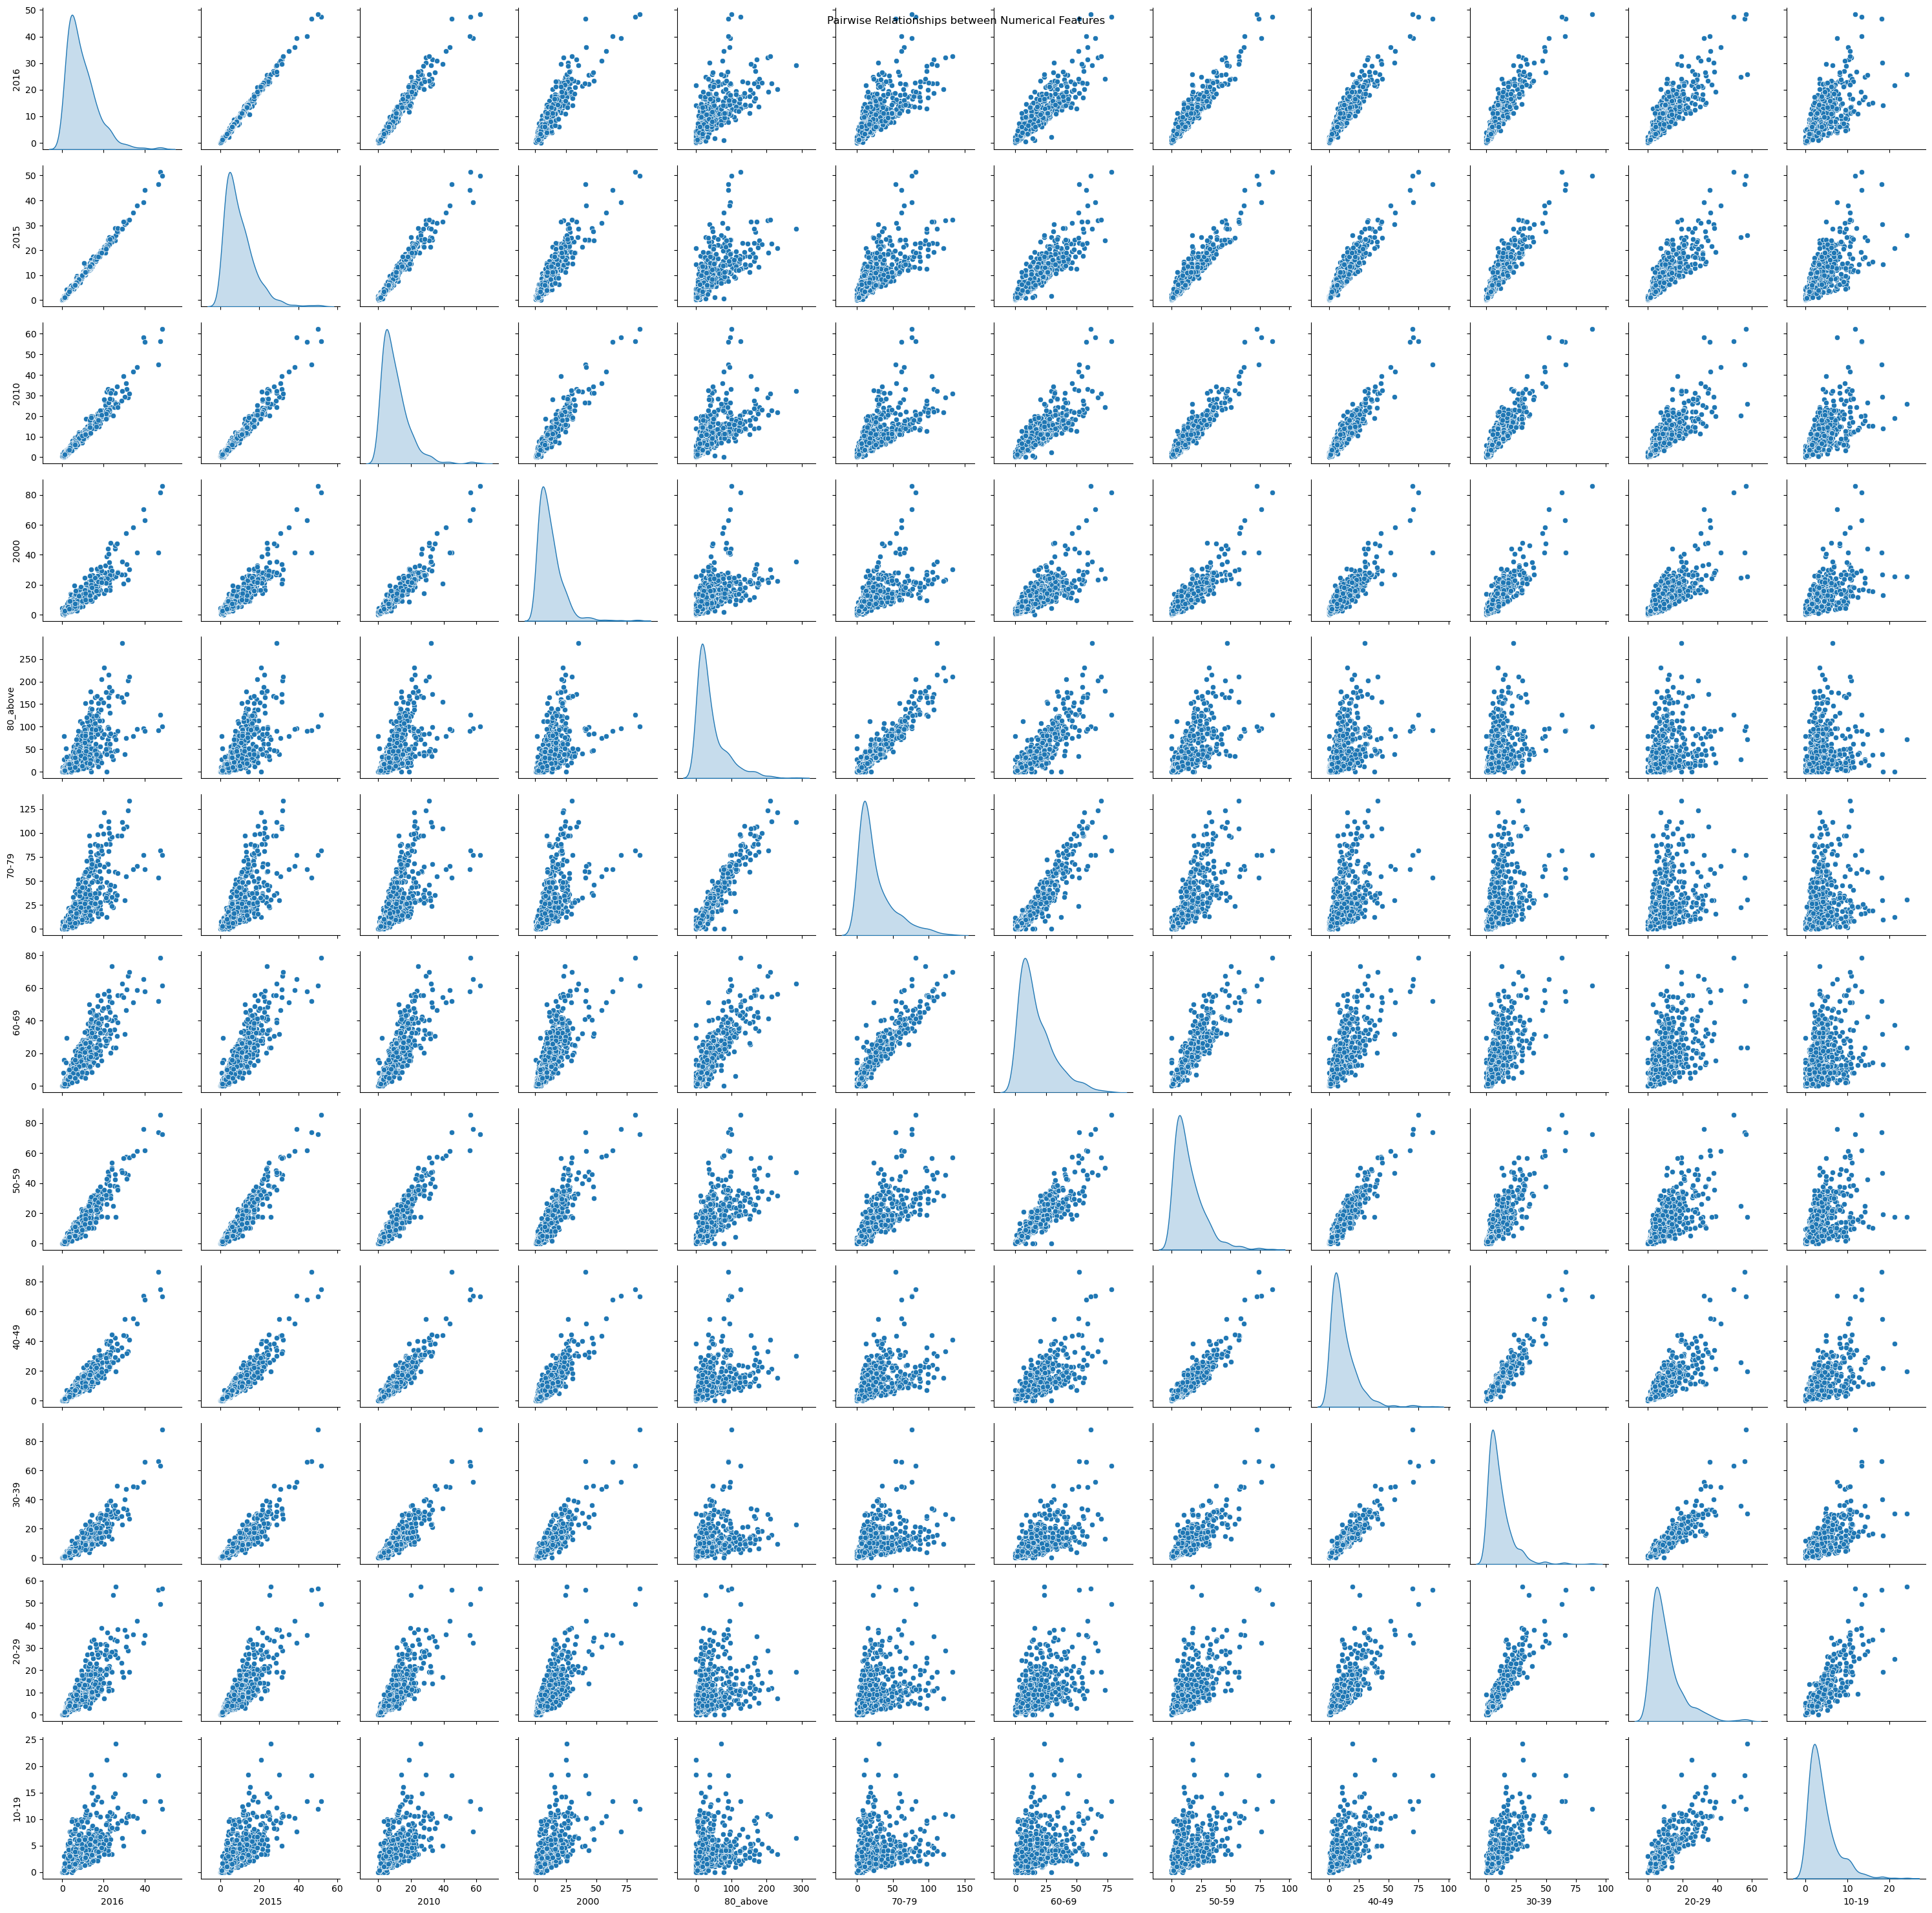

In [34]:
# Pairplot for the numerical columns
sns.pairplot(df_age[numerical_columns], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Suicide Rates by Sex for Each Year

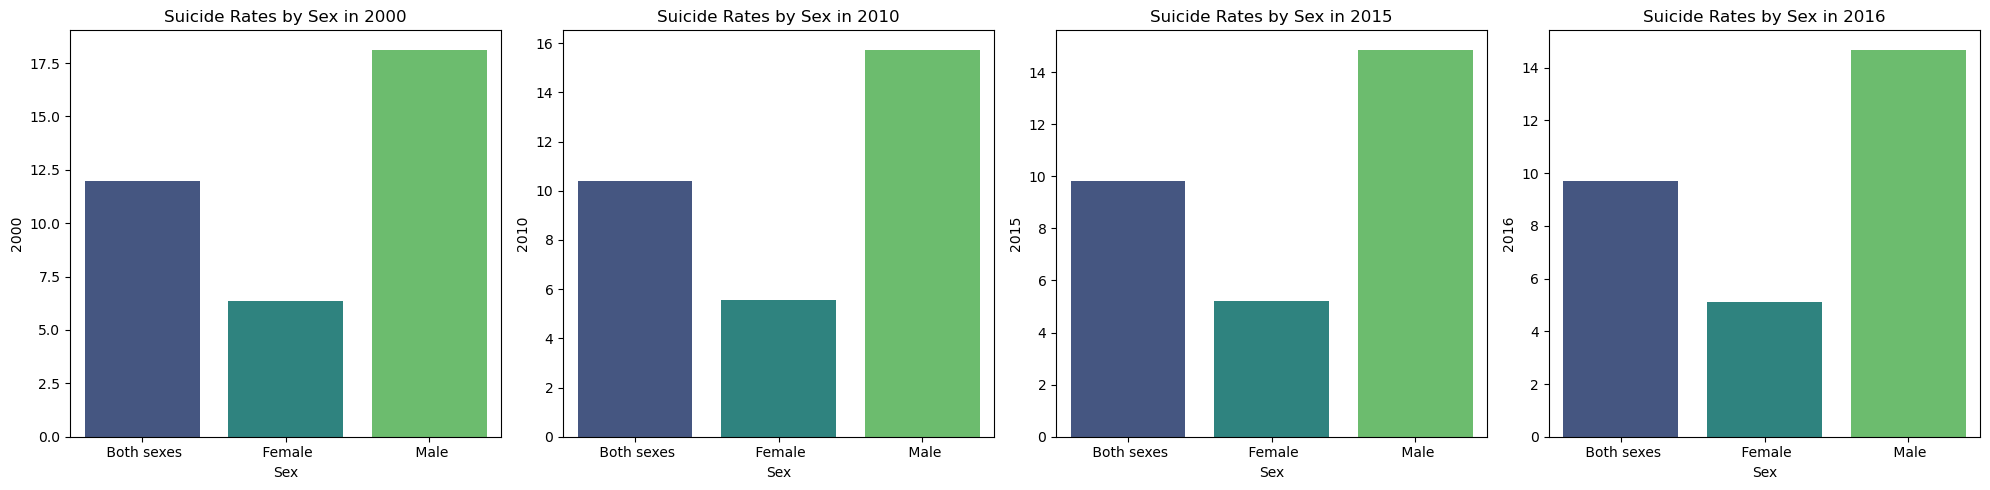

Suicide Rates by Sex for Each Year:

2000 Suicide Rates:
 Both sexes: 12.00
 Female: 6.37
 Male: 18.13

2010 Suicide Rates:
 Both sexes: 10.41
 Female: 5.54
 Male: 15.74

2015 Suicide Rates:
 Both sexes: 9.81
 Female: 5.19
 Male: 14.86

2016 Suicide Rates:
 Both sexes: 9.68
 Female: 5.09
 Male: 14.68


In [35]:
# Years to analyze
years = ['2000', '2010', '2015', '2016']

# Create a subplot grid
plt.figure(figsize=(20, 5))

# Store results for printing
sex_year_results = {}

# Loop through years
for i, year in enumerate(years, 1):
    # Create subplot
    plt.subplot(1, 4, i)
    
    # Filter dataframe for the year
    year_df = df_age[df_age[year] > 0]
    
    # Group by sex and calculate mean
    by_sex_year = year_df.groupby("Sex", as_index=False)[year].mean()
    
    # Store results
    sex_year_results[year] = by_sex_year.set_index('Sex')[year].to_dict()
    
    # Create bar plot
    sns.barplot(x="Sex", y=year, data=by_sex_year, palette='viridis')
    
    # Set title
    plt.title(f'Suicide Rates by Sex in {year}')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print out the actual figures
print("Suicide Rates by Sex for Each Year:")
for year, rates in sex_year_results.items():
    print(f"\n{year} Suicide Rates:")
    for sex, rate in rates.items():
        print(f"{sex}: {rate:.2f}")

### Observation

From the Barplot above, it could be seen that the Male Sex is more prone to suicide for all the years analyze with an average suicide rate of 14.68 in 2016, for both sexes, the average suicide rate is 9.68 why the Females has an average Suicide rate of 5.09.

In [36]:
# Checking the sex with most suicide for 2016.
def checkCountry(year):
    year_df = df_age[df_age[year]>0]
    by_sex = year_df.groupby("Sex", as_index=False)
    by_sex_year = by_sex[year].mean()
    barplot = sns.barplot(x="Sex", y=year, data=by_sex_year, palette='viridis')
#   plt.savefig('Sex.jpg', dpi=300, bbox_inches='tight')
    
    return year_df

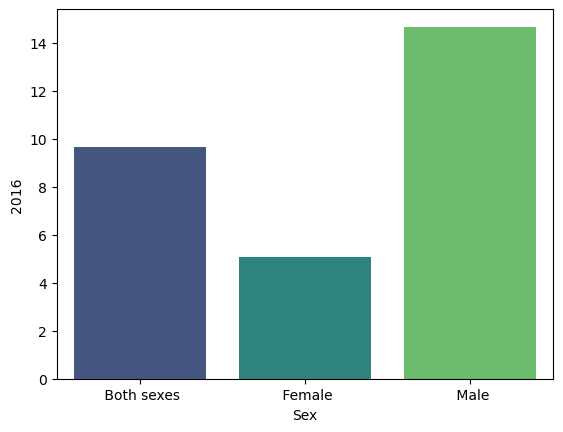

In [37]:
year_df = checkCountry("2016")

In [ ]:
# 2. Suicide Rates by Countries for Each Year

Country with most suicides in 2000: Russian Federation
Highest suicide rate: 49.0
Country with least suicides in 2000: Kuwait
Lowest suicide rate: 1.5999999999999999
Country with most suicides in 2010: Russian Federation
Highest suicide rate: 35.666666666666664
Country with least suicides in 2010: Antigua and Barbuda
Lowest suicide rate: 0.2333333333333333
Country with most suicides in 2015: Guyana
Highest suicide rate: 30.400000000000002
Country with least suicides in 2015: Barbados
Lowest suicide rate: 0.4666666666666666
Country with most suicides in 2016: Guyana
Highest suicide rate: 30.333333333333332
Country with least suicides in 2016: Antigua and Barbuda
Lowest suicide rate: 0.4666666666666666


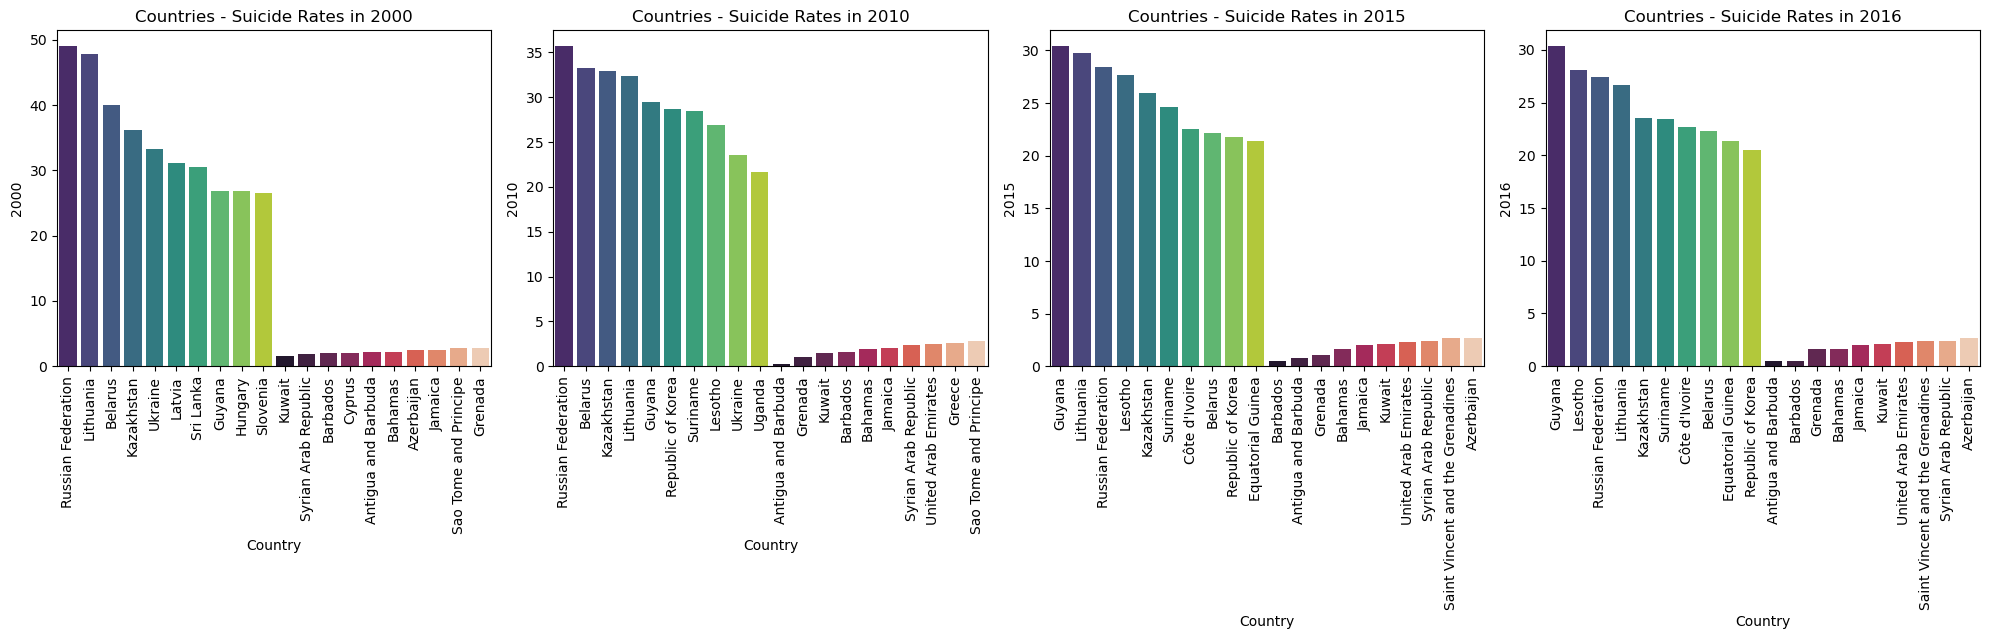

In [38]:
# Country with the most suicide by year
# Years to analyze
years = ['2000', '2010', '2015', '2016']

# Create subplot grid
plt.figure(figsize=(20, 10))

for i, year in enumerate(years, 1):
    # Create subplot for top countries
    plt.subplot(2, 4, i)
    
    # Group by country and calculate mean
    avg = df_age.groupby("Country", as_index=False)[year].mean()
    avg_df = avg.sort_values(by=year, ascending=False)
    
    # Find country with highest suicide rate
    country_most_suicides = avg.loc[avg[year].idxmax(), 'Country']
    highest_suicide_rate = avg[year].max()
    
    print(f"Country with most suicides in {year}: {country_most_suicides}")
    print(f"Highest suicide rate: {highest_suicide_rate}")
    
    # Plot top 10 countries
    sns.barplot(x="Country", y=year, data=avg_df.head(10), palette='viridis')
    plt.title(f'Top 10 Countries - Suicide Rates in {year}')
    plt.xticks(rotation=90)
    #plt.savefig('Countries High suicide rate.jpg', dpi=300, bbox_inches='tight')
    
    
    # Create subplot for bottom countries
#     plt.subplot(2, 4, i+4)
    
    # Sort in ascending order for lowest suicide rates
    avg_df_lowest = avg.sort_values(by=year, ascending=True)
    
    # Find country with lowest suicide rate
    country_least_suicides = avg.loc[avg[year].idxmin(), 'Country']
    lowest_suicide_rate = avg[year].min()
    
    print(f"Country with least suicides in {year}: {country_least_suicides}")
    print(f"Lowest suicide rate: {lowest_suicide_rate}")
    
    # Plot bottom 10 countries
    sns.barplot(x="Country", y=year, data=avg_df_lowest.head(10), palette='rocket')
    plt.title(f'Countries - Suicide Rates in {year}')
    plt.xticks(rotation=90)
#     plt.savefig('Countries suicide rate.jpg', dpi=300, bbox_inches='tight')
    

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Suicide Trends From The Plot:
Big Drop: Highest rate fell from 49.0 (2000) to 30.4 (2015-2016).
Country Shift: Russia led in 2000/2010, Guyana in 2015/2016.
Consistently Low: Small nations like Antigua,  Kuwait, Barbados maintain very low rates.


In [39]:
# 3. Suicide rates across the Age groups

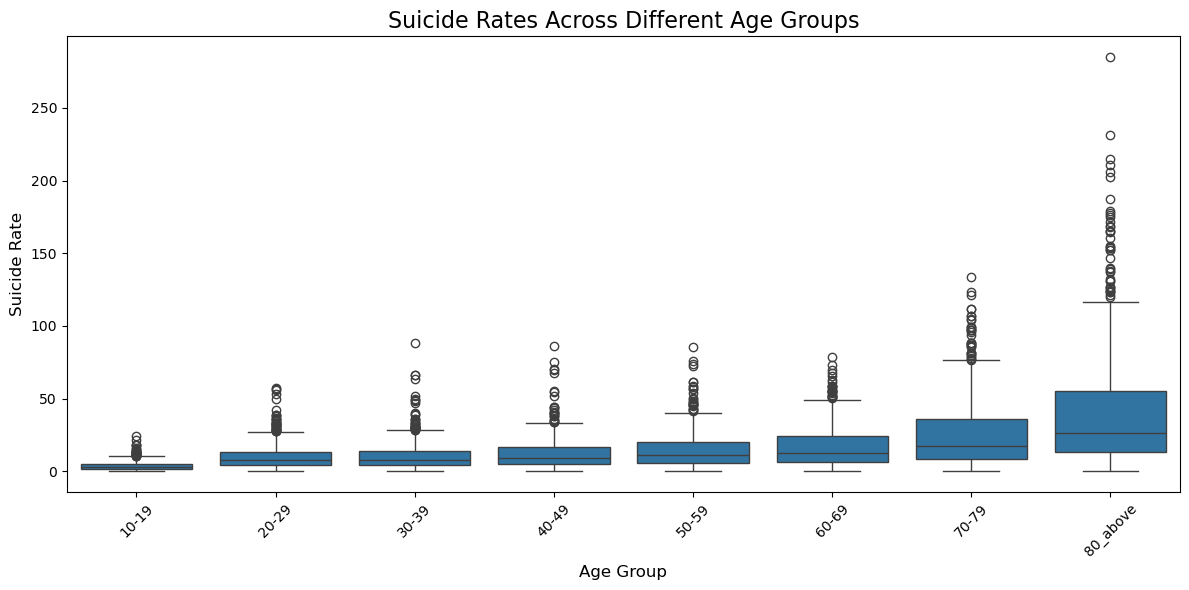

Descriptive Statistics of Suicide Rates by Age Group:
           count  unique  top  freq
Age_Group                          
10-19      549.0   121.0  2.4  15.0
20-29      549.0   216.0  3.1  11.0
30-39      549.0   223.0  2.5  10.0
40-49      549.0   247.0  6.1   9.0
50-59      549.0   283.0  0.0  10.0
60-69      549.0   309.0  8.1   8.0
70-79      549.0   345.0  0.0  11.0
80_above   549.0   389.0  0.0  18.0

Aggregate Analysis:
                mean  median    max  min        std
Age_Group                                          
80_above   42.585428    26.6  285.0  0.0  43.477900
70-79      25.936794    17.1  133.7  0.0  24.795457
60-69      17.439162    12.9   78.5  0.0  14.315504
50-59      14.743352    11.2   85.4  0.0  12.790041
40-49      12.189435     9.0   86.5  0.0  11.121364
30-39      10.895446     8.0   88.4  0.0  10.148280
20-29      10.423315     7.9   57.4  0.0   9.051273
10-19       4.075046     3.1   24.2  0.0   3.393507


In [40]:
# Melt the DataFrame to create a long format for easier analysis
df_age_long = df_age.melt(id_vars=['Country'], 
                           var_name='Age_Group', 
                           value_name='Suicide_Rate')

# Remove the age group we want to keep
age_groups_to_analyze = [
    '70-79', '60-69', '50-59', '40-49', 
    '30-39', '20-29', '10-19','80_above'
]

# Filter the long format DataFrame
df_age_analysis = df_age_long[df_age_long['Age_Group'].isin(age_groups_to_analyze)]

# Visualization of suicide rates by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Suicide_Rate', data=df_age_analysis, order=sorted(age_groups_to_analyze))

plt.title('Suicide Rates Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Suicide Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Descriptive statistics
print("Descriptive Statistics of Suicide Rates by Age Group:")
print(df_age_analysis.groupby('Age_Group')['Suicide_Rate'].describe())

# Aggregate analysis
print("\nAggregate Analysis:")
age_group_summary = df_age_analysis.groupby('Age_Group')['Suicide_Rate'].agg([
    'mean', 'median', 'max', 'min', 'std'
]).sort_values('mean', ascending=False)
print(age_group_summary)

The boxplot above shows highlights suicide rates across age groups

80+ years have the highest median suicide rate and the widest variability, indicating older adults are most affected.
Rates gradually increase with age, with significant jumps from 60+ years onward.
10–19 years consistently show the lowest rates, suggesting younger age groups are less impacted.
Outliers are present in all groups but are more pronounced in older age brackets, reflecting variability in specific regions or circumstances.

### Insight

The higher rates in older adults may be linked to factors like isolation, chronic illness, or lack of support, while younger groups benefit from protective factors like family and community.

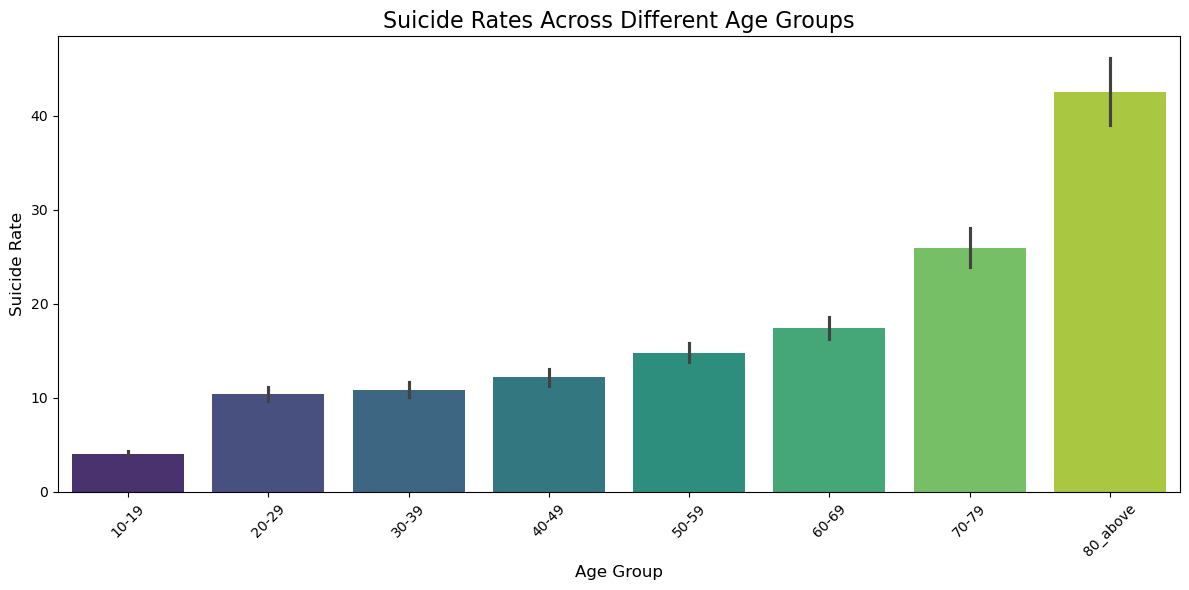

In [41]:


# Visualization of suicide rates by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='Age_Group', y='Suicide_Rate', palette='viridis', data=df_age_analysis, order=sorted(age_groups_to_analyze))


plt.title('Suicide Rates Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Suicide Rate', fontsize=12)
plt.xticks(rotation=45)
#plt.savefig('Suicide Rates Across Different Age Groups.jpg', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


From the plot above, it can be seen that suicide rates increase with age.

Why? Elderly face isolation, health issues, & loss of loved ones, while younger individuals may have stronger social support. Prevention must address age-specific challenges.

In [42]:
# Calculate mean suicide rates for each age group
mean_suicide_rates = df_age_analysis.groupby('Age_Group')['Suicide_Rate'].mean().sort_values(ascending=False)

# Find the age group with the highest mean suicide rate
highest_risk_group = mean_suicide_rates.index[0]
highest_rate = mean_suicide_rates.iloc[0]

# Find the age group with the lowest mean suicide rate
lowest_risk_group = mean_suicide_rates.index[-1]
lowest_rate = mean_suicide_rates.iloc[-1]

# Print results
print(f"Age Group with Highest Suicide Rate: {highest_risk_group}")
print(f"Average Suicide Rate (Highest): {highest_rate:.2f}")
print(f"\nAge Group with Lowest Suicide Rate: {lowest_risk_group}")
print(f"Average Suicide Rate (Lowest): {lowest_rate:.2f}")

# Detailed breakdown of suicide rates by age group
print("\nMean Suicide Rates by Age Group:")
print(mean_suicide_rates)

Age Group with Highest Suicide Rate: 80_above
Average Suicide Rate (Highest): 42.59

Age Group with Lowest Suicide Rate: 10-19
Average Suicide Rate (Lowest): 4.08

Mean Suicide Rates by Age Group:
Age_Group
80_above    42.585428
70-79       25.936794
60-69       17.439162
50-59       14.743352
40-49       12.189435
30-39       10.895446
20-29       10.423315
10-19        4.075046
Name: Suicide_Rate, dtype: float64


In [62]:


# Preparing a modified dataframe
df_years_long = df_age.melt(
    id_vars=['Country', 'Sex'], 
    var_name='Year', 
    value_name='Suicide_Rate'
)

# Filter out years that might not be actual years
df_years_long = df_years_long[df_years_long['Year'].isin(years)]



# Additional statistical analysis
print("Suicide Rate Trends:")
# Group by year and sex to get detailed statistics
yearly_sex_stats = df_years_long.groupby(['Year', 'Sex'])['Suicide_Rate'].agg(['mean', 'median', 'std']).reset_index()
print(yearly_sex_stats)

# Calculate overall trend
print("\nOverall Trend:")
overall_trend = df_years_long.groupby('Year')['Suicide_Rate'].mean()
print(overall_trend)

# Identify years with highest and lowest suicide rates
max_year = overall_trend.idxmax()
min_year = overall_trend.idxmin()
print(f"\nYear with Highest Average Suicide Rate: {max_year}")
print(f"Year with Lowest Average Suicide Rate: {min_year}")

Suicide Rate Trends:
    Year          Sex       mean  median        std
0   2000   Both sexes  11.996721    10.8   7.761358
1   2000       Female   6.368306     5.4   4.530383
2   2000         Male  18.127322    16.2  13.190515
3   2010   Both sexes  10.414754     9.3   6.444987
4   2010       Female   5.481421     4.7   4.187223
5   2010         Male  15.738798    14.0  10.571025
6   2015   Both sexes   9.807104     9.1   5.671086
7   2015       Female   5.192350     4.4   3.867297
8   2015         Male  14.777596    13.3   9.061462
9   2016   Both sexes   9.682514     9.1   5.529334
10  2016       Female   5.092896     4.3   3.855238
11  2016         Male  14.602186    13.5   8.778946

Overall Trend:
Year
2000    12.164117
2010    10.544991
2015     9.925683
2016     9.792532
Name: Suicide_Rate, dtype: float64

Year with Highest Average Suicide Rate: 2000
Year with Lowest Average Suicide Rate: 2016


In [64]:
# 4. Suicide Rate Trend Over the Years by Sex

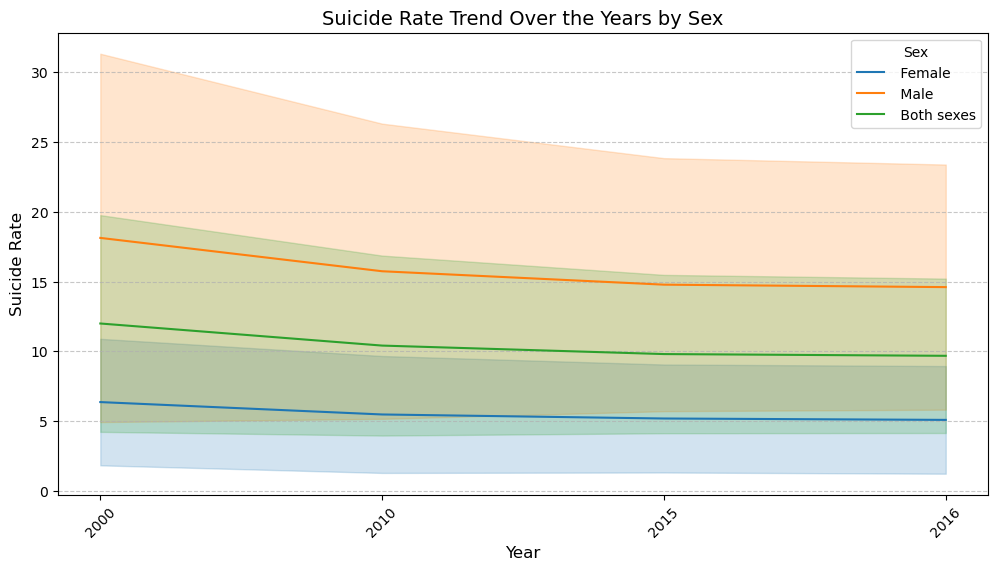

In [68]:


df = df_years_long.copy()
# Sorting by Year to ensure the trend is in chronological order
df = df.sort_values(by="Year")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Suicide_Rate", hue="Sex", ci='sd')

# Add titles and labels
plt.title("Suicide Rate Trend Over the Years by Sex", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Suicide Rate", fontsize=12)
plt.legend(title="Sex")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('Suicide Rate Trend Over the Years by Sex.jpg', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()


### 📊 Suicide Rates by Gender (2000–2016):
Overall Decline: Rates dropped significantly, steeper in 2000–2010, slower by 2016.
Males: Consistently higher rates than females.
Females: Lower rates, steady gap with males.
Both Sexes: Trends align between male and female data.

In [69]:
# Get the suicide trends for all the countries in the dataset

In [70]:
# Aggregate data by year to get the average suicide rate per year
yearly_trends = df.groupby('Year')['Suicide_Rate'].mean().reset_index()

# Print yearly trends
print("Yearly Suicide Rate Trends:")
print(yearly_trends)

# Aggregate data by Sex to calculate the overall trend
overall_trend = df.groupby('Sex')['Suicide_Rate'].mean().reset_index()

# Print overall trend
print("\nOverall Suicide Rate Trend by Sex:")
print(overall_trend)

# Optional: If you want to calculate percentage change over time
yearly_trends['Yearly_Change'] = yearly_trends['Suicide_Rate'].pct_change() * 100

print("\nYearly Percentage Changes in Suicide Rates:")
print(yearly_trends)


Yearly Suicide Rate Trends:
   Year  Suicide_Rate
0  2000     12.164117
1  2010     10.544991
2  2015      9.925683
3  2016      9.792532

Overall Suicide Rate Trend by Sex:
           Sex  Suicide_Rate
0   Both sexes     10.475273
1       Female      5.533743
2         Male     15.811475

Yearly Percentage Changes in Suicide Rates:
   Year  Suicide_Rate  Yearly_Change
0  2000     12.164117            NaN
1  2010     10.544991     -13.310672
2  2015      9.925683      -5.873005
3  2016      9.792532      -1.341481


Text(0.5, 0.98, 'Suicide Rate Trends by Country and Sex')

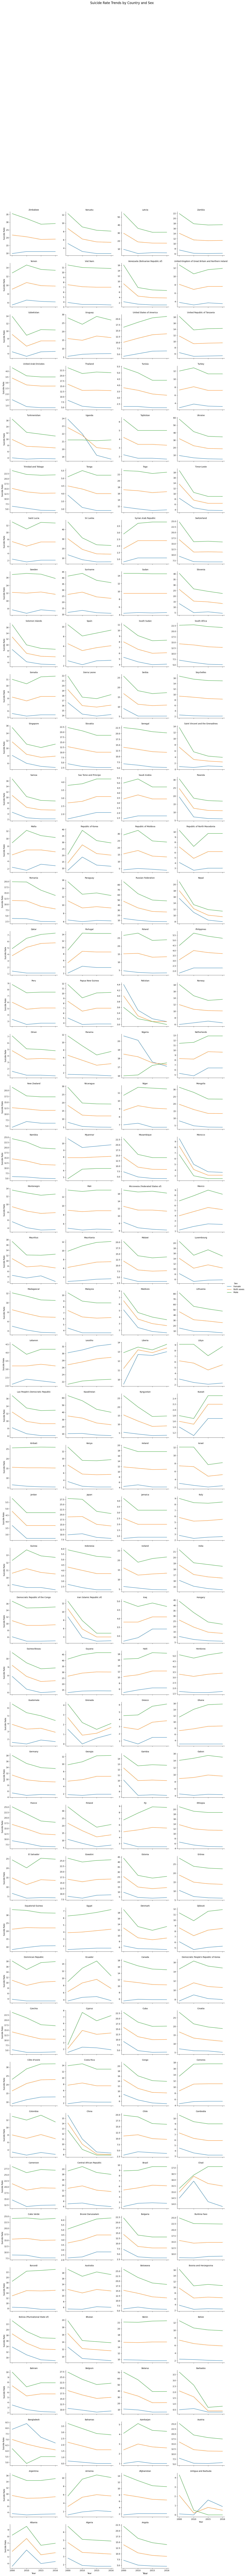

In [67]:
# g = sns.FacetGrid(df, col="Country", hue="Sex", col_wrap=4, height=4, sharey=False)
# g.map(sns.lineplot, "Year", "Suicide_Rate")
# g.add_legend()
# g.set_titles("{col_name}")
# g.set_axis_labels("Year", "Suicide Rate")
# plt.xlabel("Year", fontsize=12)

# plt.subplots_adjust(top=0.9)
# g.fig.suptitle("Suicide Rate Trends by Country and Sex", fontsize=16)
#plt.savefig('All countries suicide trend.jpg', dpi=300, bbox_inches='tight')

#plt.show()


### Facilities and Human Resorces Data Set

In [71]:
concat_df = pd.concat([df_facilities, df_human], axis=1)

In [72]:
concat_df.head(7)

Country  Year  Mental _hospitals  health_units  \
0          Afghanistan  2016              0.003         0.012   
1              Albania  2016              0.068         0.068   
2              Algeria  2016              0.048         0.068   
3               Angola  2016              0.011           NaN   
4  Antigua And Barbuda  2016              1.001           NaN   
5            Argentina  2016              0.937         1.071   
6              Armenia  2016                NaN         0.069   

   outpatient _facilities  day _treatment  residential_facilities  \
0                   0.006             NaN                     NaN   
1                   0.410             NaN                   0.445   
2                   0.048             NaN                     NaN   
3                     NaN             NaN                   0.014   
4                     NaN             NaN                     NaN   
5                   1.720             NaN                   0.152   
6                   1.371           0.034                     NaN   

               Country    Year  Psychiatrists  Nurses  Social_workers  \
0          Afghanistan  2016.0          0.231   0.098             NaN   
1              Albania  2016.0          1.471   6.876           1.060   
2               Angola  2016.0          0.057   0.660           0.022   
3  Antigua And Barbuda  2016.0          1.001   7.005           4.003   
4            Argentina  2016.0         21.705     NaN             NaN   
5              Armenia  2016.0          3.840  11.245           0.274   
6           Azerbaijan  2016.0          3.452   6.717           0.114   

   Psychologists  
0          0.296  
1          1.231  
2          0.179  
3            NaN  
4        222.572  
5          0.788  
6          1.165

In [73]:
df_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 112 non-null    object 
 1   Year                    112 non-null    int64  
 2   Mental _hospitals       90 non-null     float64
 3   health_units            102 non-null    float64
 4   outpatient _facilities  100 non-null    float64
 5   day _treatment          51 non-null     float64
 6   residential_facilities  45 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.3+ KB


In [74]:
df_human.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         107 non-null    object 
 1   Year            107 non-null    int64  
 2   Psychiatrists   104 non-null    float64
 3   Nurses          91 non-null     float64
 4   Social_workers  68 non-null     float64
 5   Psychologists   84 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.1+ KB


In [75]:
df_human.shape

(107, 6)

In [76]:
df_facilities.shape

(112, 7)

both df_human and df_facilities has different shape, both they both have country and year columns, since they have different number of rows, on concantenation i notice the country from the df_facilities is not always align with the country on df_human. I am going to try to use inner mergeing to fix this.

In [77]:
# Clean country names
df_human['Country'] = df_human['Country'].str.strip().str.title()
df_facilities['Country'] = df_facilities['Country'].str.strip().str.title()

In [78]:
# Merge on Country and Year
merged_df = pd.merge(df_human, df_facilities, on=['Country', 'Year'], how='inner')

In [79]:
merged_df.head(10)

Country  Year  Psychiatrists  Nurses  Social_workers  \
0          Afghanistan  2016          0.231   0.098             NaN   
1              Albania  2016          1.471   6.876           1.060   
2               Angola  2016          0.057   0.660           0.022   
3  Antigua And Barbuda  2016          1.001   7.005           4.003   
4            Argentina  2016         21.705     NaN             NaN   
5              Armenia  2016          3.840  11.245           0.274   
6           Azerbaijan  2016          3.452   6.717           0.114   
7           Bangladesh  2016          0.130   0.873             NaN   
8              Belarus  2016         13.504     NaN             NaN   
9               Belize  2016          1.392   3.340             NaN   

   Psychologists  Mental _hospitals  health_units  outpatient _facilities  \
0          0.296              0.003         0.012                   0.006   
1          1.231              0.068         0.068                   0.410   
2          0.179              0.011           NaN                     NaN   
3            NaN              1.001           NaN                     NaN   
4        222.572              0.937         1.071                   1.720   
5          0.788                NaN         0.069                   1.371   
6          1.165              0.114         0.021                   0.156   
7          0.124              0.001         0.035                   0.055   
8          5.514              0.200         0.063                   0.116   
9          1.113                NaN         1.948                   2.227   

   day _treatment  residential_facilities  
0             NaN                     NaN  
1             NaN                   0.445  
2             NaN                   0.014  
3             NaN                     NaN  
4             NaN                   0.152  
5           0.034                     NaN  
6           0.094                   0.031  
7             NaN                   0.045  
8           0.285                     NaN  
9           0.278                   0.278

In [80]:
merged_df.shape

(104, 11)

In [81]:
# Find countries that don't match
human_countries = set(df_human['Country'])
facilities_countries = set(df_facilities['Country'])

print("Countries in human dataset not in facilities:")
print(human_countries - facilities_countries)

print("\nCountries in facilities dataset not in human:")
print(facilities_countries - human_countries)

Countries in human dataset not in facilities:
{'Sweden', 'Gambia', 'Suriname'}

Countries in facilities dataset not in human:
{'Iceland', 'Pakistan', 'Portugal', 'Algeria', 'Viet Nam', 'Ireland', 'Libya', 'Paraguay'}


### The Countries above will not be in the df_help dataframe

In [83]:
df_help = merged_df.copy()

In [84]:
df_help.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 104 non-null    object 
 1   Year                    104 non-null    int64  
 2   Psychiatrists           101 non-null    float64
 3   Nurses                  88 non-null     float64
 4   Social_workers          66 non-null     float64
 5   Psychologists           83 non-null     float64
 6   Mental _hospitals       82 non-null     float64
 7   health_units            95 non-null     float64
 8   outpatient _facilities  93 non-null     float64
 9   day _treatment          48 non-null     float64
 10  residential_facilities  41 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 9.8+ KB


In [85]:
# Remove white spaces from column names
df_help.columns = df_help.columns.str.strip().str.replace(' ', '')

In [86]:
df_help.isna().sum()

Country                    0
Year                       0
Psychiatrists              3
Nurses                    16
Social_workers            38
Psychologists             21
Mental_hospitals          22
health_units               9
outpatient_facilities     11
day_treatment             56
residential_facilities    63
dtype: int64

Since the day_treatment and resident_facilities columns have very high amount of missing values, we will drop those columns and try to fill the rest columns.

In [87]:
# Dropping day _treatment and residential_facilities columns
df_help = df_help.drop(columns=['day_treatment', 'residential_facilities'])

In [88]:
df_help.head()

Country  Year  Psychiatrists  Nurses  Social_workers  \
0          Afghanistan  2016          0.231   0.098             NaN   
1              Albania  2016          1.471   6.876           1.060   
2               Angola  2016          0.057   0.660           0.022   
3  Antigua And Barbuda  2016          1.001   7.005           4.003   
4            Argentina  2016         21.705     NaN             NaN   

   Psychologists  Mental_hospitals  health_units  outpatient_facilities  
0          0.296             0.003         0.012                  0.006  
1          1.231             0.068         0.068                  0.410  
2          0.179             0.011           NaN                    NaN  
3            NaN             1.001           NaN                    NaN  
4        222.572             0.937         1.071                  1.720

In [89]:
df_help.isna().sum()

Country                   0
Year                      0
Psychiatrists             3
Nurses                   16
Social_workers           38
Psychologists            21
Mental_hospitals         22
health_units              9
outpatient_facilities    11
dtype: int64

In [90]:
# Handling Missing Values For The Remaining Columns

In [91]:
# Identify numerical columns
numerical_columns = df_help.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with mode for each numerical column
for column in numerical_columns:
    df_help[column].fillna(df_help[column].mode()[0], inplace=True)

In [92]:
df_help.isna().sum()

Country                  0
Year                     0
Psychiatrists            0
Nurses                   0
Social_workers           0
Psychologists            0
Mental_hospitals         0
health_units             0
outpatient_facilities    0
dtype: int64

In [93]:
df_help.columns

Index(['Country', 'Year', 'Psychiatrists', 'Nurses', 'Social_workers',
       'Psychologists', 'Mental_hospitals', 'health_units',
       'outpatient_facilities'],
      dtype='object')

In [94]:
df_help.describe()

Year  Psychiatrists      Nurses  Social_workers  Psychologists  \
count   104.0     104.000000  104.000000      104.000000     104.000000   
mean   2016.0       4.127500    9.958538        3.162288       8.411221   
std       0.0       7.485445   21.429399       13.825886      28.533482   
min    2016.0       0.007000    0.000000        0.006000       0.000000   
25%    2016.0       0.200750    0.269250        0.019000       0.020000   
50%    2016.0       1.126500    2.202500        0.052000       0.560000   
75%    2016.0       4.071000    8.620750        0.581500       3.044750   
max    2016.0      48.040000  150.251000      102.592000     222.572000   

       Mental_hospitals  health_units  outpatient_facilities  
count        104.000000    104.000000             104.000000  
mean           0.204673      0.255923               1.698279  
std            0.849827      0.450436               3.195221  
min            0.000000      0.006000               0.006000  
25%            0.011000      0.026750               0.066000  
50%            0.024000      0.076000               0.372000  
75%            0.118250      0.321000               1.727000  
max            8.314000      2.647000              19.751000

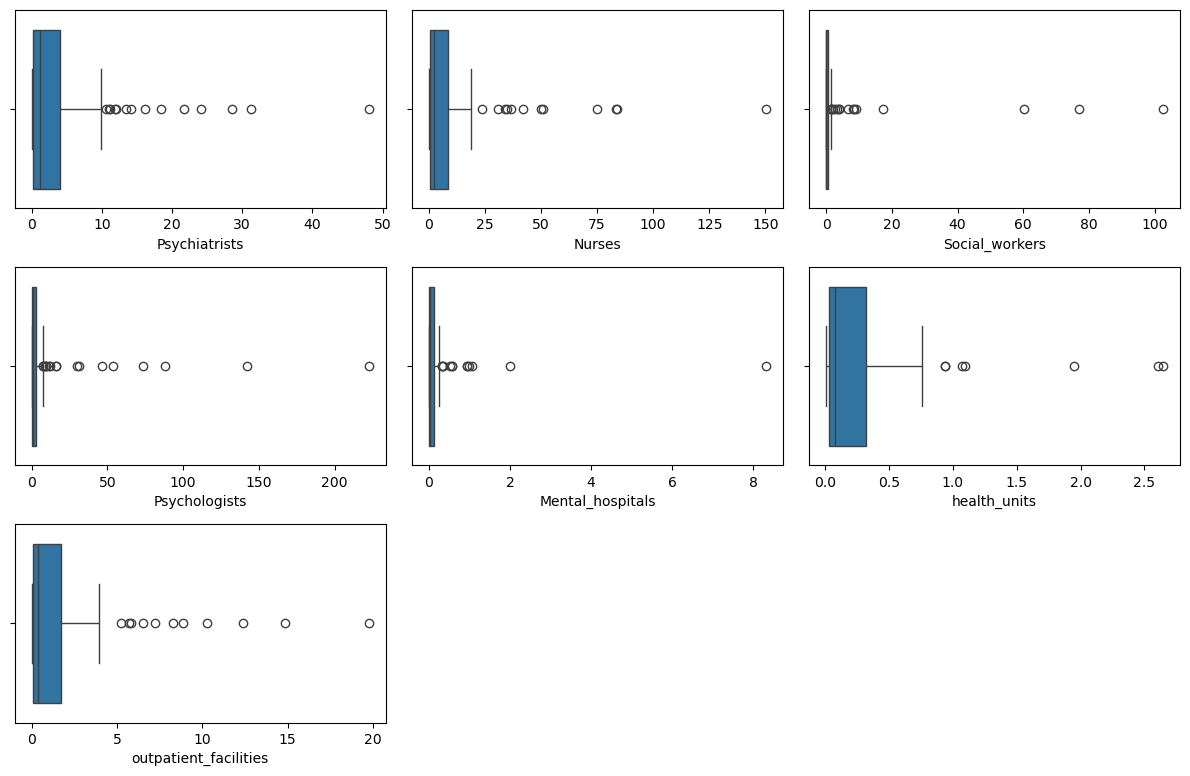

In [95]:
# Select numerical columns
# Identify numerical columns excluding 'Year'
numerical_columns_help = [col for col in df_help.select_dtypes(include=['float64', 'int64']).columns if col != 'Year']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_columns_help, 1): # Looping through each numerical feature
    plt.subplot(4, 3, i) # Creating a subplot for each feature, arranged in a 4x3 grid
    sns.boxplot(df_help[feature], orient='h') # boxplot for the features distribution
    
plt.tight_layout() # Adjusting subplots to fit neatly into the figure
plt.show() # Displaying the plot

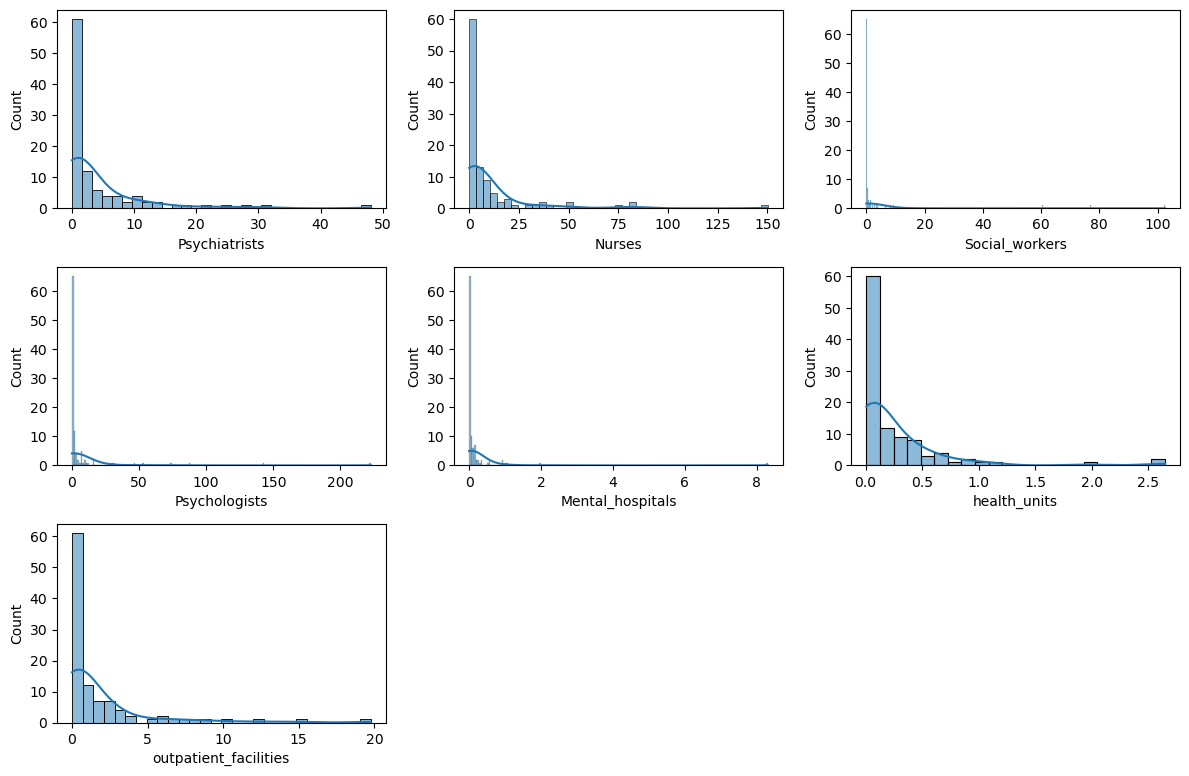

In [96]:
# Select numerical columns

plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_columns_help, 1): # Looping through each numerical feature
    plt.subplot(4, 3, i) # Creating a subplot for each feature, arranged in a 4x3 grid
    sns.histplot(df_help[feature], kde=True) # hisplot for the features distribution
    
plt.tight_layout() # Adjusting subplots to fit neatly into the figure
plt.show() # Displaying the plot

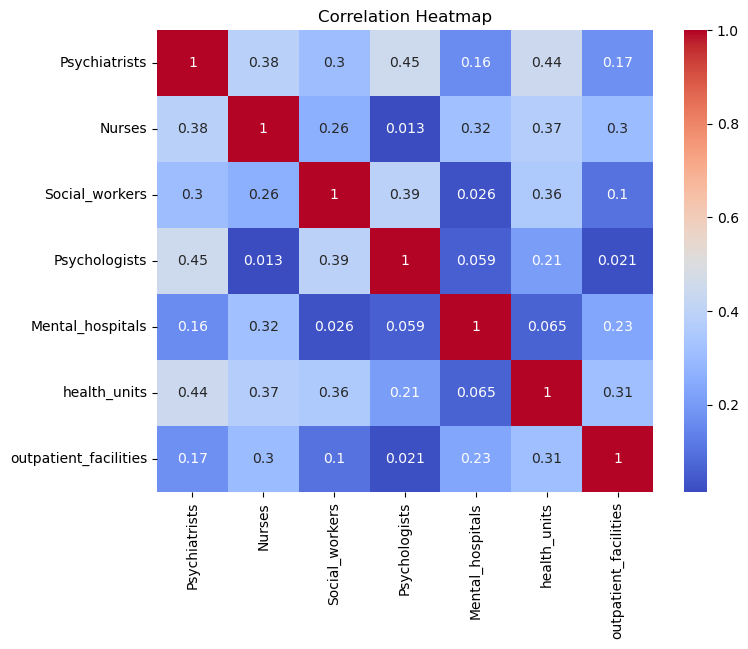

In [97]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_help[numerical_columns_help].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

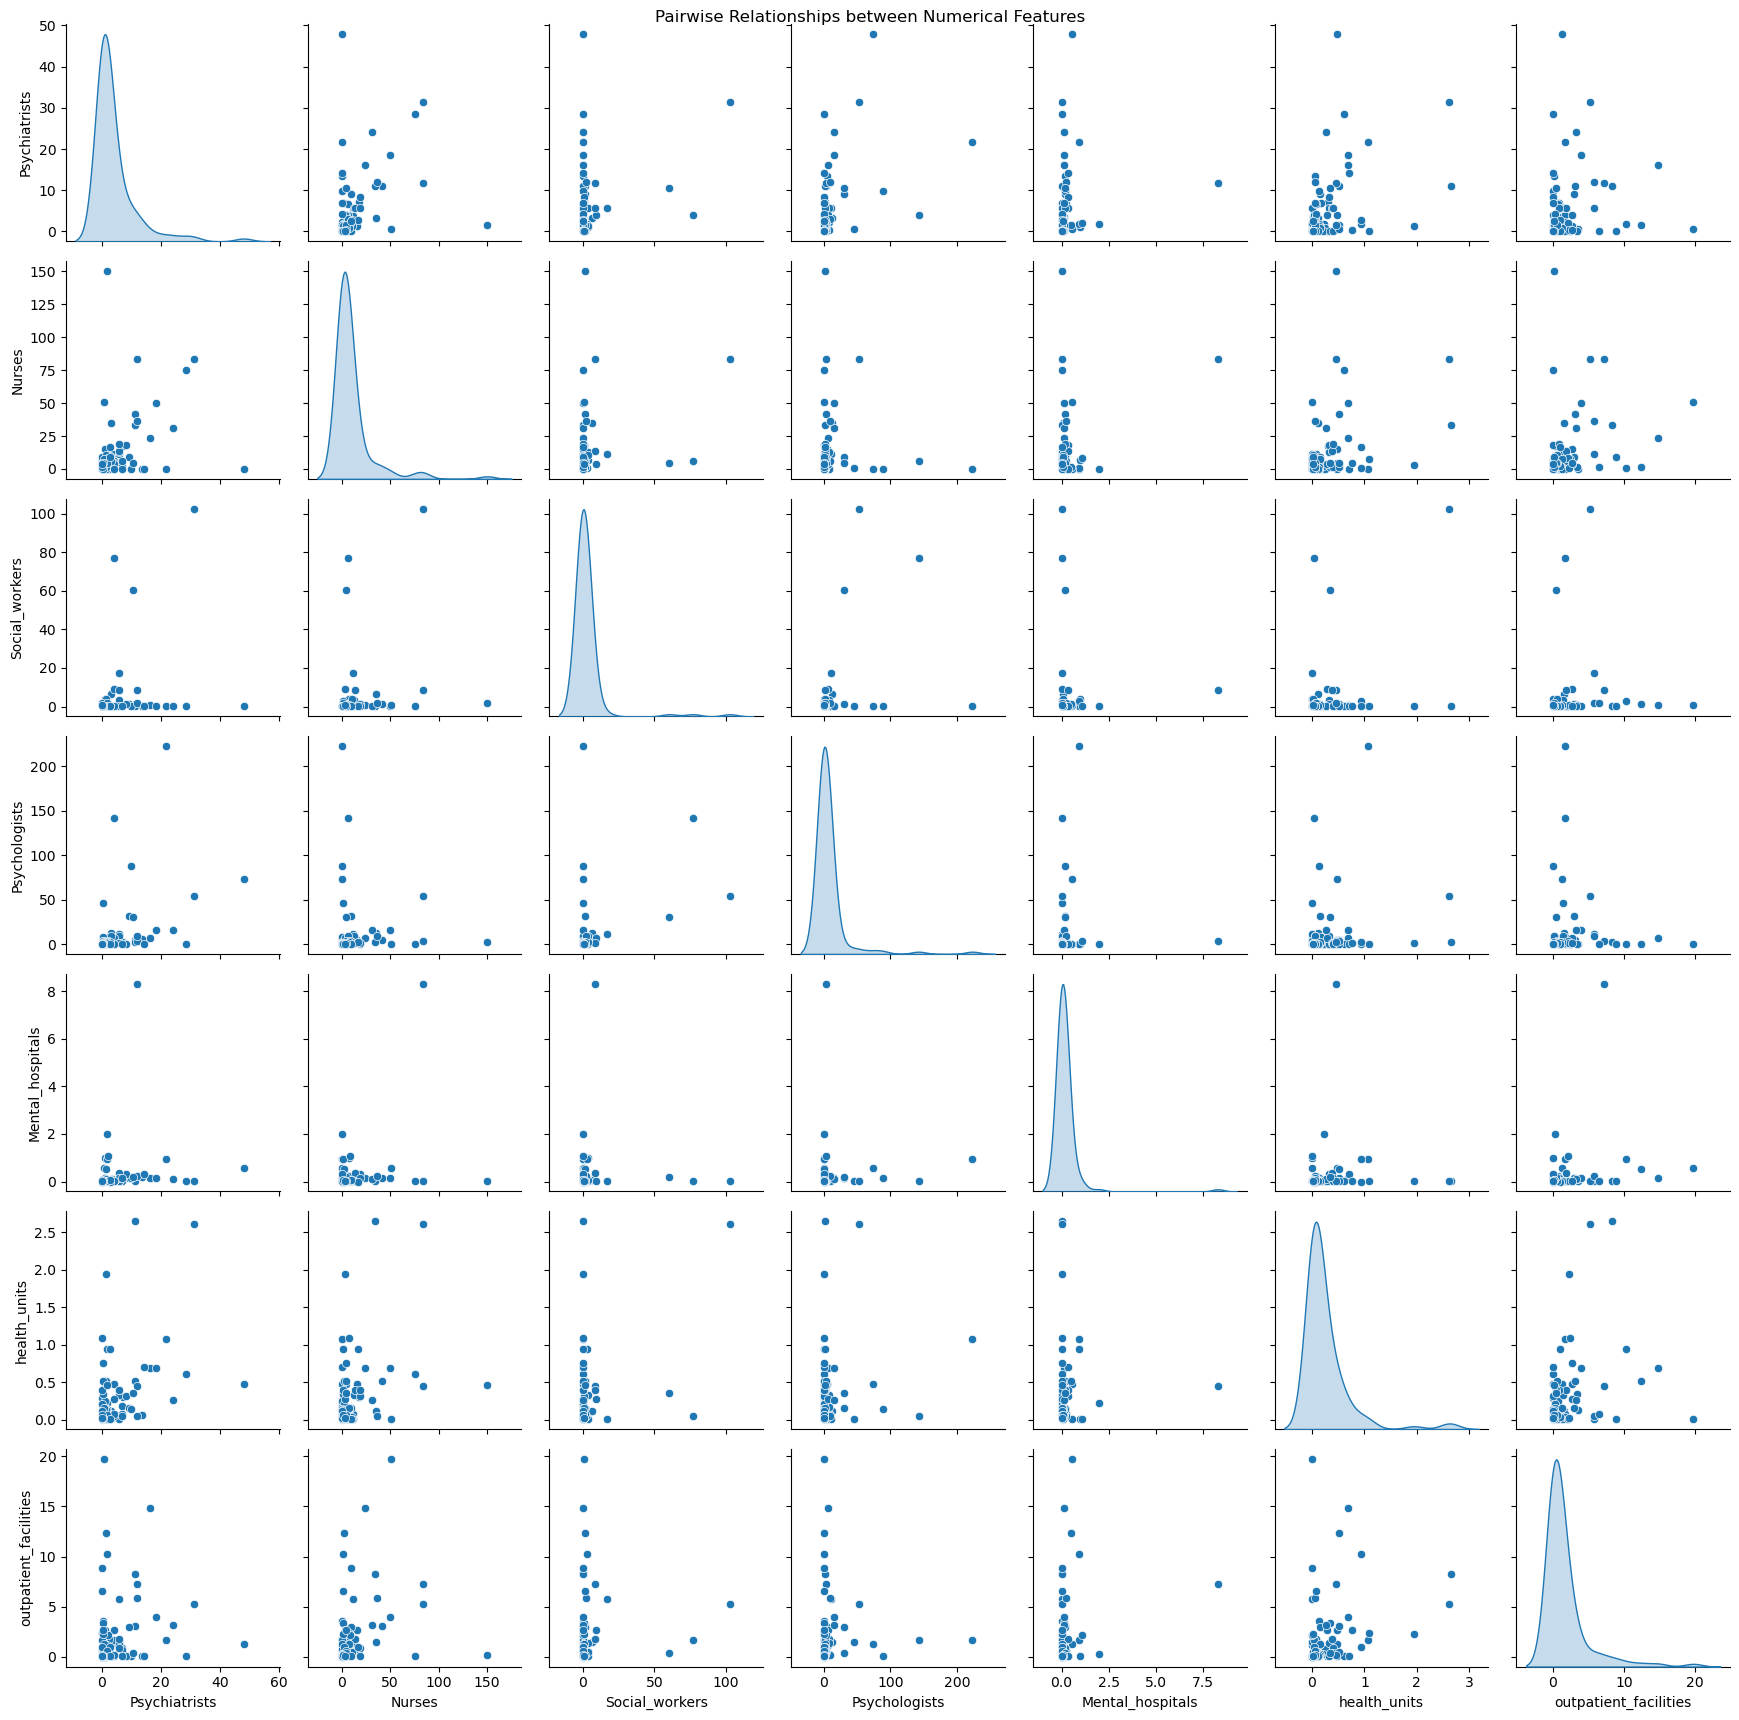

In [98]:
sns.pairplot(df_help[numerical_columns_help], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Numerical Features')
plt.tight_layout()
plt.show()

### We won't remove outliers from the dataset because doing so will tamper with important data for our analysis

In [99]:
# List of columns to analyze
columns_to_analyze = [
    'Psychiatrists', 'Nurses', 'Social_workers', 
    'Psychologists', 'Mental_hospitals', 'health_units', 
    'outpatient_facilities'
]

# Function to print top and bottom 10 for each column
def analyze_metrics(dataframe):
    for column in columns_to_analyze:
        print(f"\n--- {column} Analysis ---")
        
        # Top 10 highest
        print("Top 10 Highest:")
        top_10_highest = dataframe.nlargest(10, column)[['Country', column]]
        print(top_10_highest)
        
        # Top 10 Lowest (excluding zero values)
        print("\nTop 10 Lowest (non-zero):")
        lowest_10 = dataframe[dataframe[column] > 0].nsmallest(10, column)[['Country', column]]
        print(lowest_10)
        print("\n" + "="*50)

In [100]:
analyze_metrics(df_help)


--- Psychiatrists Analysis ---
Top 10 Highest:
        Country  Psychiatrists
68       Norway         48.040
57       Monaco         31.326
66  New Zealand         28.540
72       Poland         24.176
4     Argentina         21.705
52    Lithuania         18.452
31      Estonia         16.188
98      Uruguay         14.134
8       Belarus         13.504
84     Slovenia         11.953

Top 10 Lowest (non-zero):
          Country  Psychiatrists
17           Chad          0.007
67          Niger          0.014
30        Eritrea          0.025
39         Guinea          0.025
40  Guinea-Bissau          0.025
64          Nauru          0.025
86    South Sudan          0.025
55           Mali          0.029
15   Burkina Faso          0.039
51        Liberia          0.044


--- Nurses Analysis ---
Top 10 Highest:
        Country   Nurses
93       Turkey  150.251
47        Japan   83.805
57       Monaco   83.536
66  New Zealand   75.132
77  Saint Lucia   50.788
52    Lithuania   49.763
24  

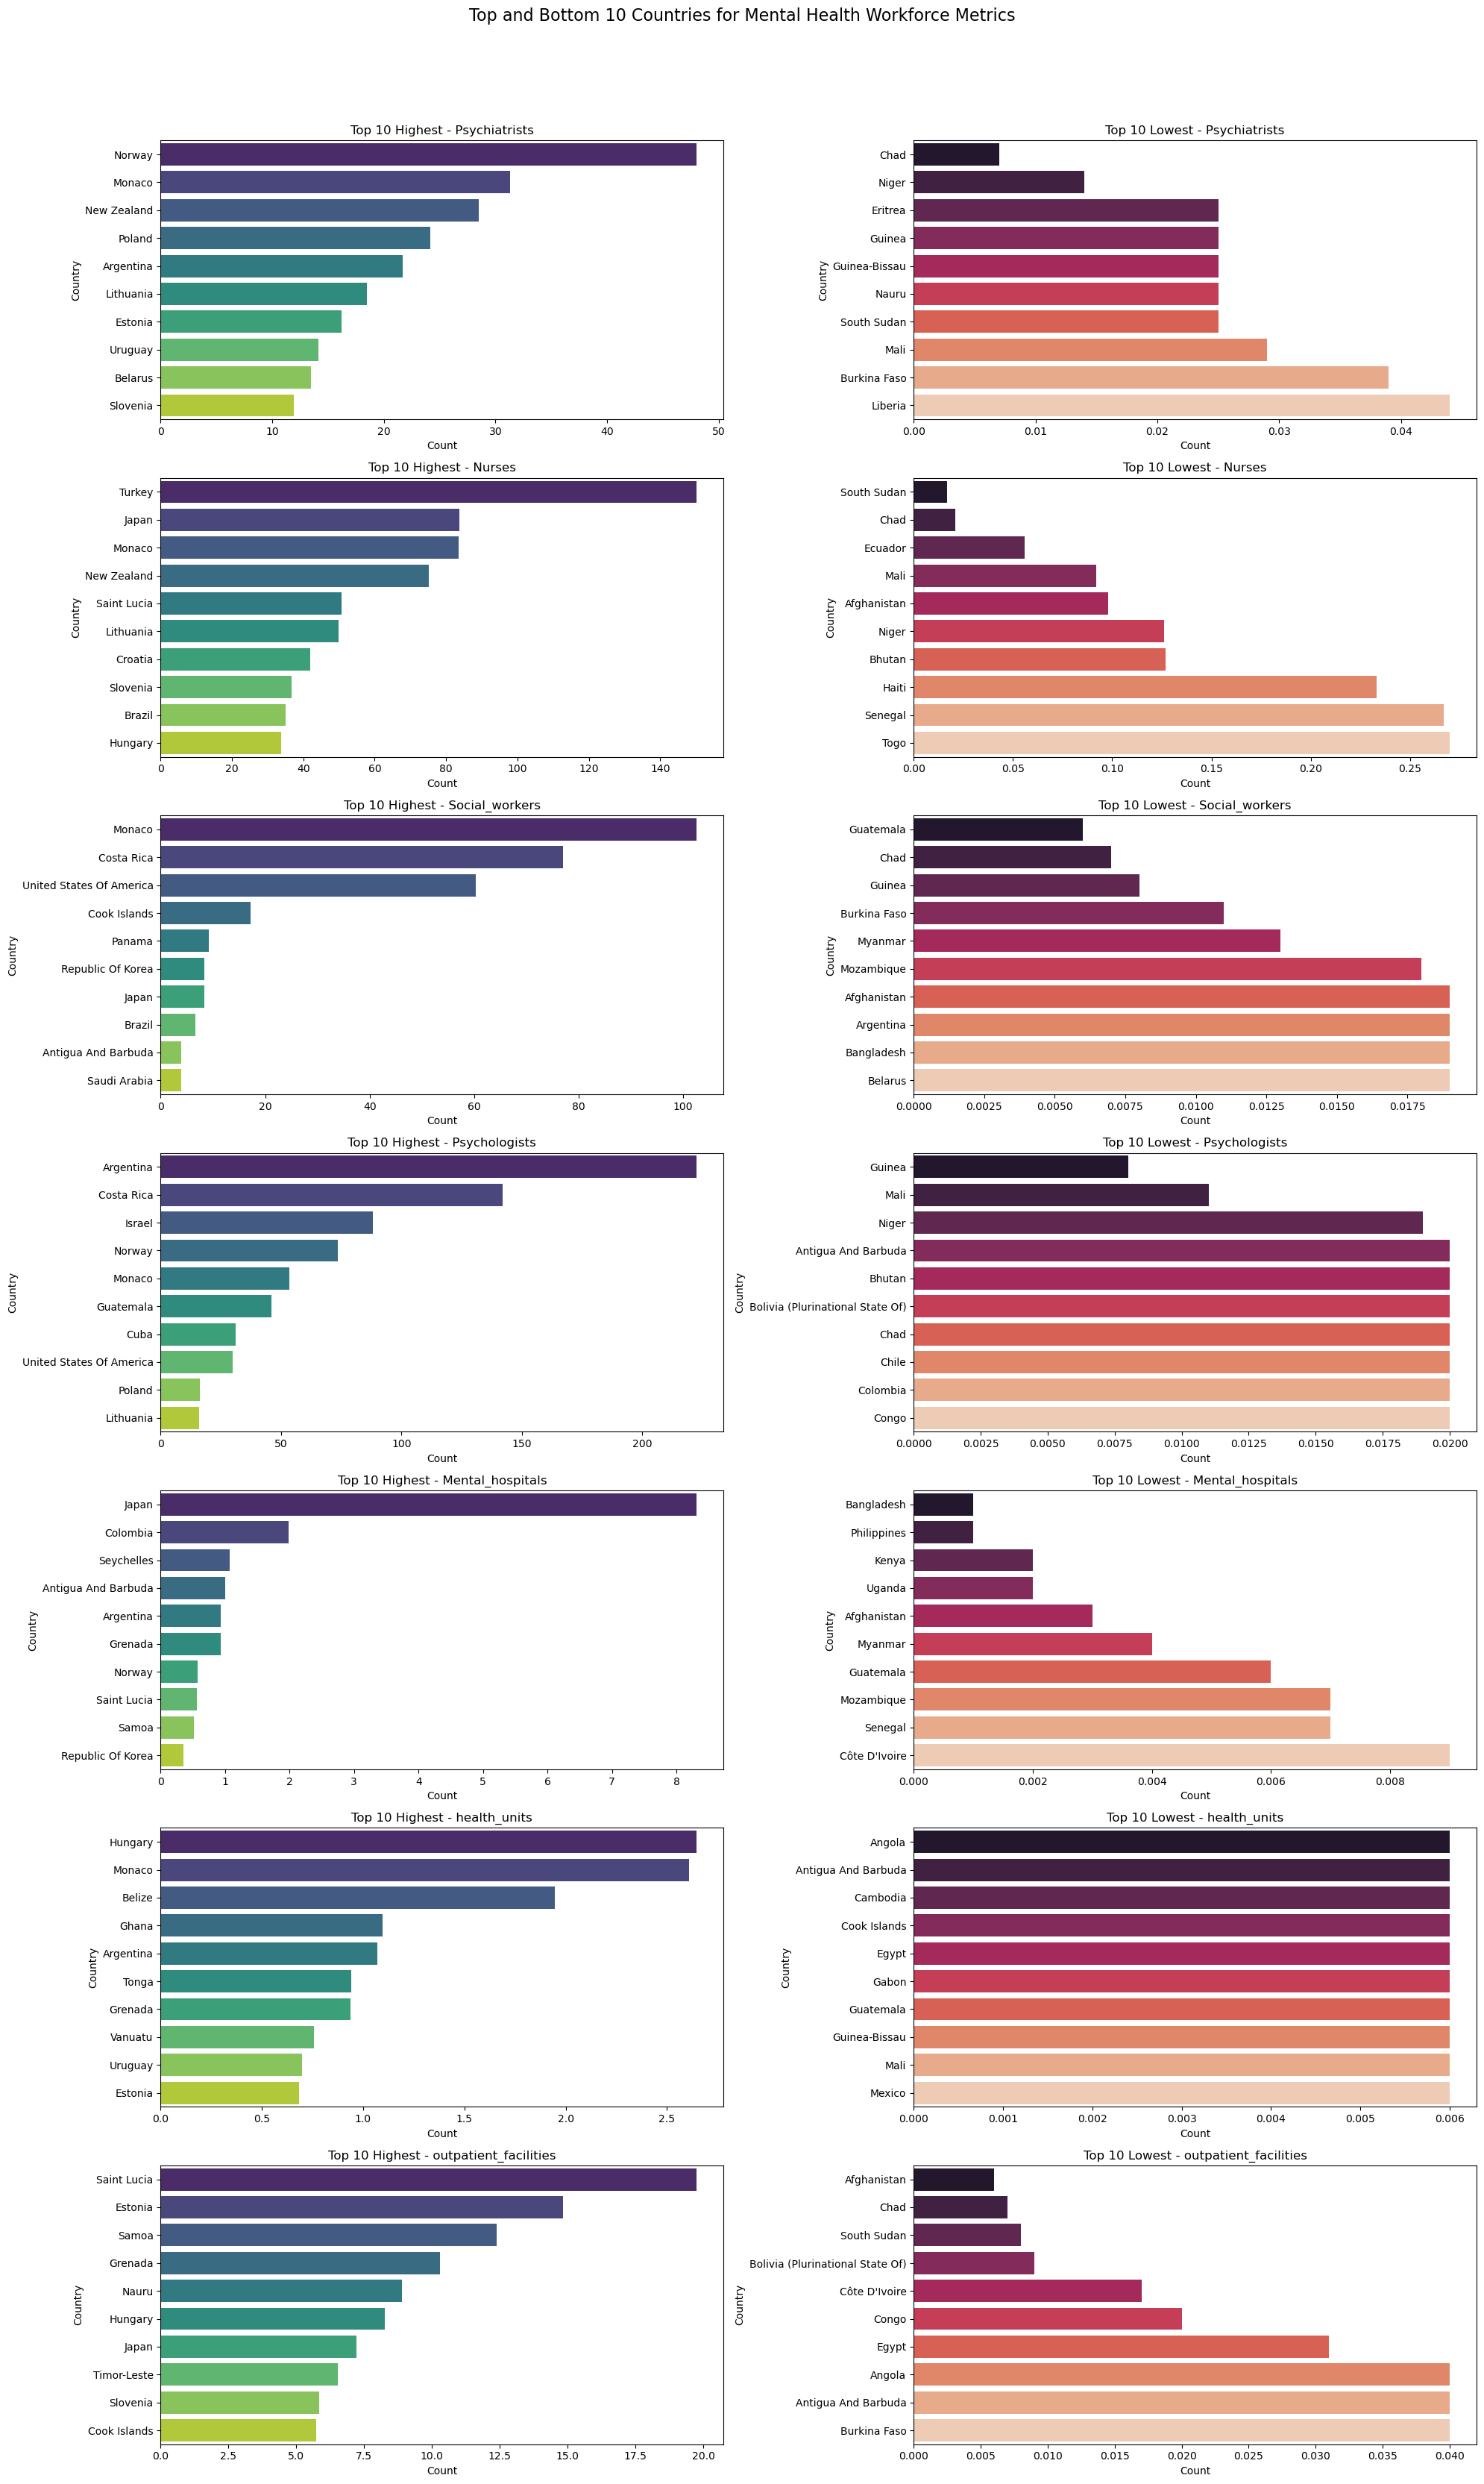

In [101]:


# List of columns to analyze for mental health workforce metrics
columns_to_analyze = [
    'Psychiatrists', 'Nurses', 'Social_workers', 
    'Psychologists', 'Mental_hospitals', 'health_units', 
    'outpatient_facilities'
]

def visualize_top_and_bottom_metrics(dataframe):
    """
    Create visualizations for top 10 and bottom 10 countries 
    across different mental health workforce metrics.
    
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        DataFrame containing mental health workforce data
    """
    # Calculate number of rows needed for subplots
    num_columns = len(columns_to_analyze)
    
    # Create a figure with two columns for top and bottom 10 for each metric
    fig, axes = plt.subplots(num_columns, 2, figsize=(20, 5*num_columns))
    fig.suptitle('Top and Bottom 10 Countries for Mental Health Workforce Metrics', fontsize=16)
    
    # Iterate through each column to create visualizations
    for i, column in enumerate(columns_to_analyze):
        # Find top 10 highest values
        top_10_highest = dataframe.nlargest(10, column)
        
        # Visualize top 10 highest (left subplot)
        sns.barplot(x=column, y='Country', data=top_10_highest, ax=axes[i, 0], palette='viridis')
        axes[i, 0].set_title(f'Top 10 Highest - {column}')
        axes[i, 0].set_xlabel('Count')
        axes[i, 0].set_ylabel('Country')
        
        # Find bottom 10 lowest values (excluding zeros)
        bottom_10_lowest = dataframe[dataframe[column] > 0].nsmallest(10, column)
        
        # Visualize bottom 10 lowest (right subplot)
        sns.barplot(x=column, y='Country', data=bottom_10_lowest, ax=axes[i, 1], palette='rocket')
        axes[i, 1].set_title(f'Top 10 Lowest - {column}')
        axes[i, 1].set_xlabel('Count')
        axes[i, 1].set_ylabel('Country')
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Display the plot
    plt.show()

# Execute the visualization function
visualize_top_and_bottom_metrics(df_help)

In [102]:
# Country with most sucide, gender with most suicde, Age group with most suicide and year most suicides was occured.

In [188]:
# Select rows for a specific country
df_age.loc[df_age['Country'] == 'Nigeria']

Country          Sex  2016  2015  2010  2000  80_above  70-79  60-69  \
357  Nigeria   Both sexes  17.3  17.5  18.2  18.5     127.0   86.9   48.8   
358  Nigeria         Male  17.5  17.2  16.1  16.0     130.7   74.0   41.7   
359  Nigeria       Female  17.1  17.6  20.1  20.6     123.9   98.6   55.4   

     50-59  40-49  30-39  20-29  10-19  
357   26.0   14.6   12.1   11.4    4.0  
358   25.0   17.0   14.7   13.9    4.3  
359   27.1   12.2    9.5    8.9    3.7

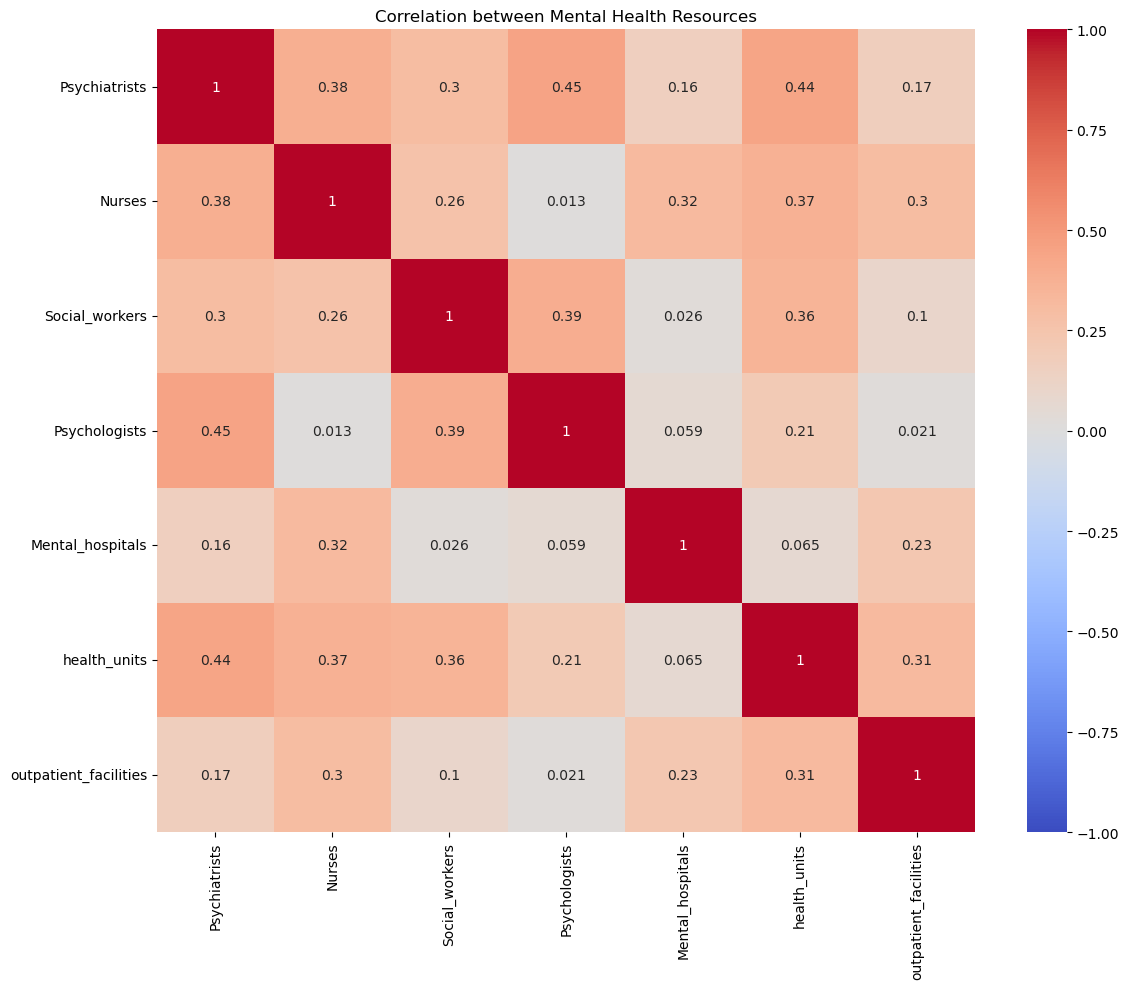

Descriptive Statistics of Mental Health Resources:
       Psychiatrists      Nurses  Social_workers  Psychologists  \
count     104.000000  104.000000      104.000000     104.000000   
mean        4.127500    9.958538        3.162288       8.411221   
std         7.485445   21.429399       13.825886      28.533482   
min         0.007000    0.000000        0.006000       0.000000   
25%         0.200750    0.269250        0.019000       0.020000   
50%         1.126500    2.202500        0.052000       0.560000   
75%         4.071000    8.620750        0.581500       3.044750   
max        48.040000  150.251000      102.592000     222.572000   

       Mental_hospitals  health_units  outpatient_facilities  
count        104.000000    104.000000             104.000000  
mean           0.204673      0.255923               1.698279  
std            0.849827      0.450436               3.195221  
min            0.000000      0.006000               0.006000  
25%            0.011000      0

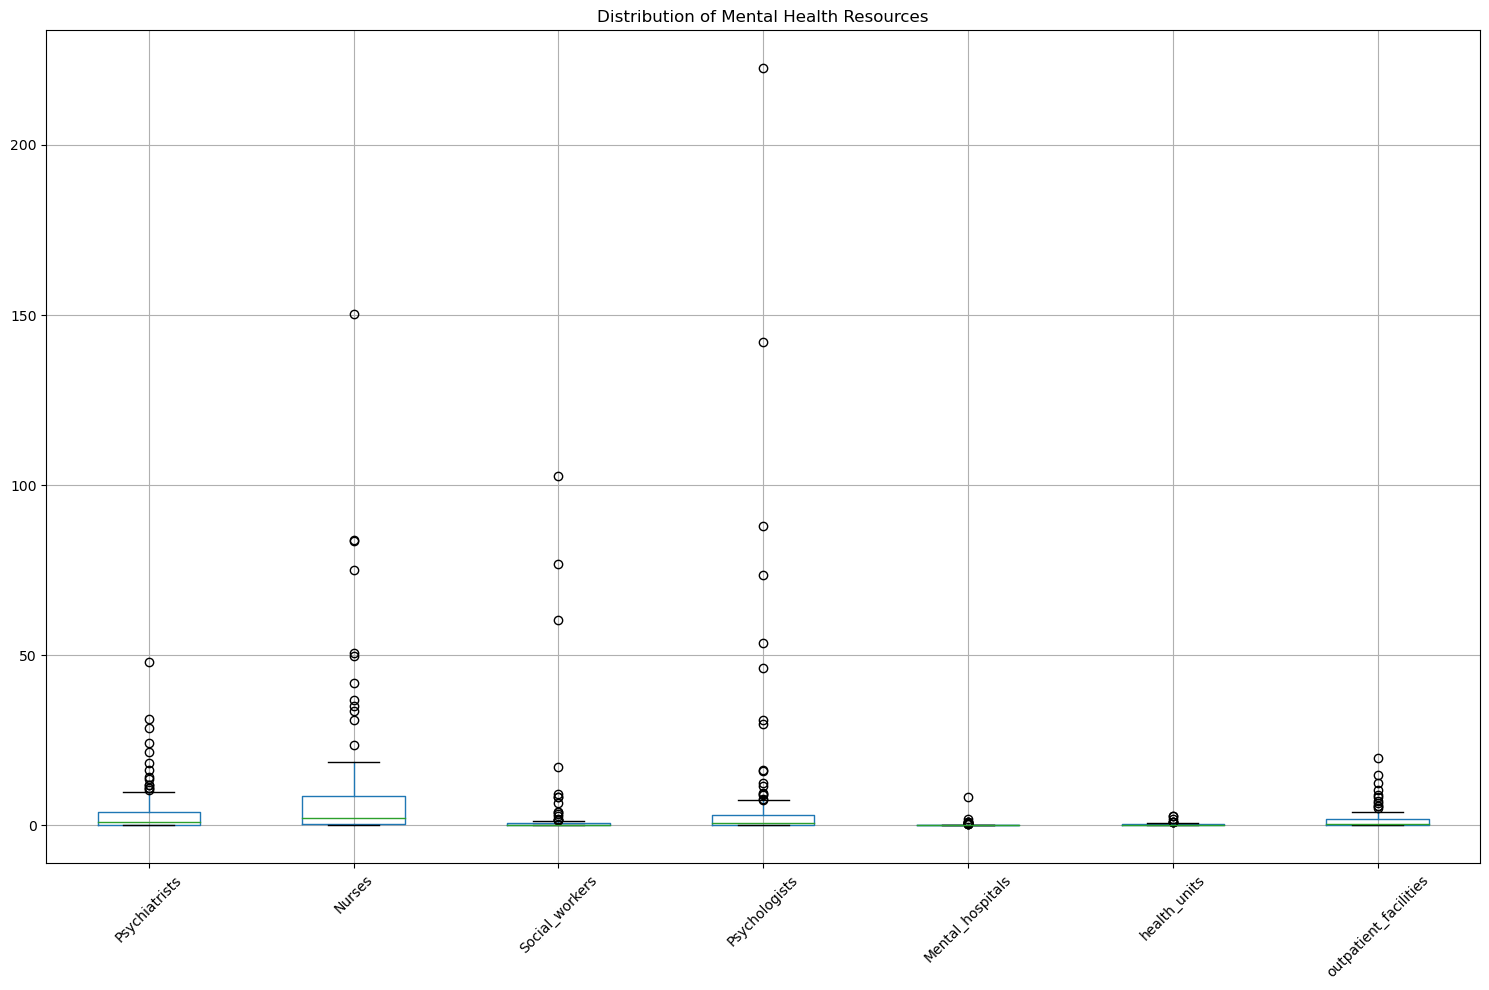


Top 5 Countries in Psychiatrists:
Country
Norway         48.040
Monaco         31.326
New Zealand    28.540
Poland         24.176
Argentina      21.705
Name: Psychiatrists, dtype: float64

Top 5 Countries in Mental Health Hospitals:
Country
Japan                  8.314
Colombia               1.988
Seychelles             1.067
Antigua And Barbuda    1.001
Argentina              0.937
Name: Mental_hospitals, dtype: float64


(                       Psychiatrists    Nurses  Social_workers  Psychologists  \
 Psychiatrists               1.000000  0.383834        0.302919       0.450183   
 Nurses                      0.383834  1.000000        0.259184       0.013315   
 Social_workers              0.302919  0.259184        1.000000       0.393206   
 Psychologists               0.450183  0.013315        0.393206       1.000000   
 Mental_hospitals            0.163111  0.317181        0.026294       0.058650   
 health_units                0.443072  0.372010        0.355062       0.208588   
 outpatient_facilities       0.171843  0.300935        0.100052       0.021326   
 
                        Mental_hospitals  health_units  outpatient_facilities  
 Psychiatrists                  0.163111      0.443072               0.171843  
 Nurses                         0.317181      0.372010               0.300935  
 Social_workers                 0.026294      0.355062               0.100052  
 Psychologists        

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_mental_health_resources(df_help):
    # Select mental health resource columns
    resource_columns = [
        'Psychiatrists', 'Nurses', 'Social_workers', 
        'Psychologists', 'Mental_hospitals', 
        'health_units', 'outpatient_facilities'
    ]
    
    # Correlation Matrix
    correlation_matrix = df_help[resource_columns].corr()
    
    # Correlation Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                center=0, vmin=-1, vmax=1)
    plt.title('Correlation between Mental Health Resources')
    plt.tight_layout()
    plt.show()
    
    # Descriptive Statistics
    resource_stats = df_help[resource_columns].describe()
    print("Descriptive Statistics of Mental Health Resources:")
    print(resource_stats)
    
    # Box Plots for Resource Distribution
    plt.figure(figsize=(15, 10))
    df_help[resource_columns].boxplot()
    plt.title('Distribution of Mental Health Resources')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Country-level Analysis
    country_resources = df_help.groupby('Country')[resource_columns].mean()
    
    print("\nTop 5 Countries in Psychiatrists:")
    print(country_resources['Psychiatrists'].nlargest(5))
    
    print("\nTop 5 Countries in Mental Health Hospitals:")
    print(country_resources['Mental_hospitals'].nlargest(5))
    
    return correlation_matrix, country_resources, resource_stats

# Note: This function would be called with your df_help dataframe
analyze_mental_health_resources(df_help)

In [137]:


# Columns
professional_columns = df_help.columns[df_help.columns.isin(['Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists'])]
facility_columns = df_help.columns[df_help.columns.isin(['Mental_hospitals', 'health_units', 'outpatient_facilities'])]

# Calculate Totals
df_help['Total_Professionals'] = df_help[professional_columns].sum(axis=1)
df_help['Total_Facilities'] = df_help[facility_columns].sum(axis=1)

# Sort for Top 20 and Bottom 20
top_20_professionals = df_help.sort_values(by='Total_Professionals', ascending=False).head(20)
bottom_20_professionals = df_help.sort_values(by='Total_Professionals', ascending=True).head(20)

top_20_facilities = df_help.sort_values(by='Total_Facilities', ascending=False).head(20)
bottom_20_facilities = df_help.sort_values(by='Total_Facilities', ascending=True).head(20)




In [145]:
df_help

Country  Year  Psychiatrists  Nurses  Social_workers  \
0            Afghanistan  2016          0.231   0.098           0.019   
1                Albania  2016          1.471   6.876           1.060   
2                 Angola  2016          0.057   0.660           0.022   
3    Antigua And Barbuda  2016          1.001   7.005           4.003   
4              Argentina  2016         21.705   0.000           0.019   
..                   ...   ...            ...     ...             ...   
99            Uzbekistan  2016          2.612   9.214           0.019   
100              Vanuatu  2016          0.378   4.535           0.378   
101                Yemen  2016          0.201   0.323           0.056   
102               Zambia  2016          0.056   1.429           0.019   
103             Zimbabwe  2016          0.095   3.486           0.634   

     Psychologists  Mental_hospitals  health_units  outpatient_facilities  \
0            0.296             0.003         0.012                  0.006   
1            1.231             0.068         0.068                  0.410   
2            0.179             0.011         0.006                  0.040   
3            0.020             1.001         0.006                  0.040   
4          222.572             0.937         1.071                  1.720   
..             ...               ...           ...                    ...   
99           0.090             0.081         0.013                  0.084   
100          0.756             0.011         0.756                  2.645   
101          0.409             0.033         0.026                  0.063   
102          0.031             0.062         0.062                  0.205   
103          0.057             0.025         0.025                  0.057   

     Total_Professionals  Total_Facilities  
0                  0.644             0.021  
1                 10.638             0.546  
2                  0.918             0.057  
3                 12.029             1.047  
4                244.296             3.728  
..                   ...               ...  
99                11.935             0.178  
100                6.047             3.412  
101                0.989             0.122  
102                1.535             0.329  
103                4.272             0.107  

[104 rows x 11 columns]

In [153]:
top_20_professionals = top_20_professionals[['Country', 'Total_Professionals'] + list(professional_columns)]
top_20_professionals

Country  Total_Professionals  Psychiatrists   Nurses  \
57                    Monaco              270.969         31.326   83.536   
4                  Argentina              244.296         21.705    0.000   
22                Costa Rica              228.605          3.931    5.699   
93                    Turkey              156.068          1.637  150.251   
68                    Norway              121.581         48.040    0.000   
47                     Japan              107.037         11.867   83.805   
97  United States Of America              105.027         10.542    4.283   
66               New Zealand              103.711         28.540   75.132   
46                    Israel               97.978          9.870    0.000   
52                 Lithuania               84.094         18.452   49.763   
72                    Poland               71.457         24.176   30.916   
84                  Slovenia               59.958         11.953   36.727   
24                   Croatia               58.616         11.095   41.856   
12                    Brazil               57.089          3.165   34.948   
77               Saint Lucia               51.936          0.564   50.788   
25                      Cuba               50.351          9.056    8.899   
38                 Guatemala               47.716          0.492    1.071   
43                   Hungary               47.321         11.079   33.739   
31                   Estonia               46.664         16.188   23.484   
21              Cook Islands               45.848          5.731   11.462   

    Social_workers  Psychologists  
57         102.592         53.515  
4            0.019        222.572  
22          76.957        142.018  
93           1.643          2.537  
68           0.019         73.522  
47           8.328          3.037  
97          60.338         29.864  
66           0.019          0.020  
46           0.019         88.089  
52           0.019         15.860  
72           0.019         16.346  
84           1.976          9.302  
24           1.298          4.367  
12           6.608         12.368  
77           0.564          0.020  
25           1.335         31.061  
38           0.006         46.147  
43           0.019          2.484  
31           0.532          6.460  
21          17.193         11.462

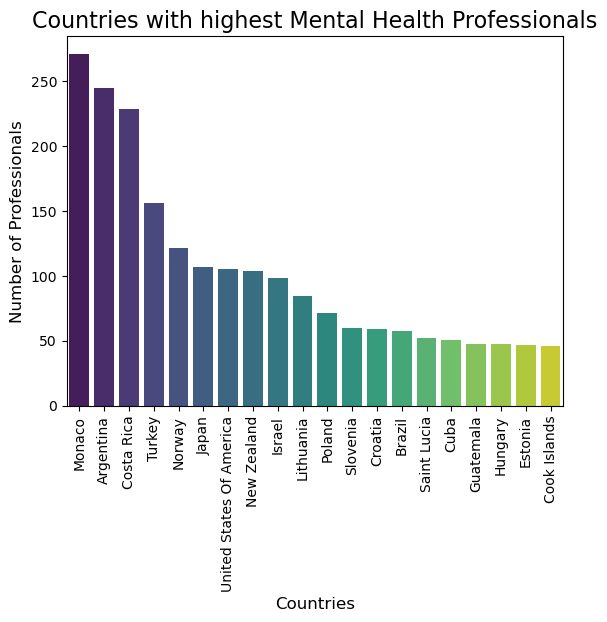

In [169]:
sns.barplot(data=top_20_professionals, x='Country', y='Total_Professionals', palette='viridis')
plt.title('Countries with highest Mental Health Professionals', fontsize=16)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of Professionals', fontsize=12)
plt.xticks(rotation=90)
#lt.savefig('Countries with highest Mental Health Professionals.jpg', dpi=300, bbox_inches='tight')

#lt.tight_layout()
plt.show()

In [166]:
bottom_20_professionals = bottom_20_professionals[['Country', 'Total_Professionals'] + list(professional_columns)]
bottom_20_professionals

Country  Total_Professionals  Psychiatrists  Nurses  \
39          Guinea                0.041          0.025   0.000   
17            Chad                0.055          0.007   0.021   
55            Mali                0.151          0.029   0.092   
67           Niger                0.187          0.014   0.126   
49           Kenya                0.223          0.184   0.000   
86     South Sudan                0.322          0.025   0.017   
61      Mozambique                0.453          0.046   0.000   
53      Madagascar                0.484          0.058   0.314   
23   Côte D'Ivoire                0.550          0.130   0.381   
81         Senegal                0.554          0.200   0.267   
20           Congo                0.620          0.080   0.500   
0      Afghanistan                0.644          0.231   0.098   
10          Bhutan                0.674          0.508   0.127   
15    Burkina Faso                0.707          0.039   0.635   
62         Myanmar                0.738          0.384   0.321   
91            Togo                0.782          0.054   0.270   
2           Angola                0.918          0.057   0.660   
41          Guyana                0.930          0.911   0.000   
101          Yemen                0.989          0.201   0.323   
40   Guinea-Bissau                1.098          0.025   0.791   

     Social_workers  Psychologists  
39            0.008          0.008  
17            0.007          0.020  
55            0.019          0.011  
67            0.028          0.019  
49            0.019          0.020  
86            0.019          0.261  
61            0.018          0.389  
53            0.050          0.062  
23            0.019          0.020  
81            0.067          0.020  
20            0.020          0.020  
0             0.019          0.296  
10            0.019          0.020  
15            0.011          0.022  
62            0.013          0.020  
91            0.054          0.404  
2             0.022          0.179  
41            0.019          0.000  
101           0.056          0.409  
40            0.169          0.113

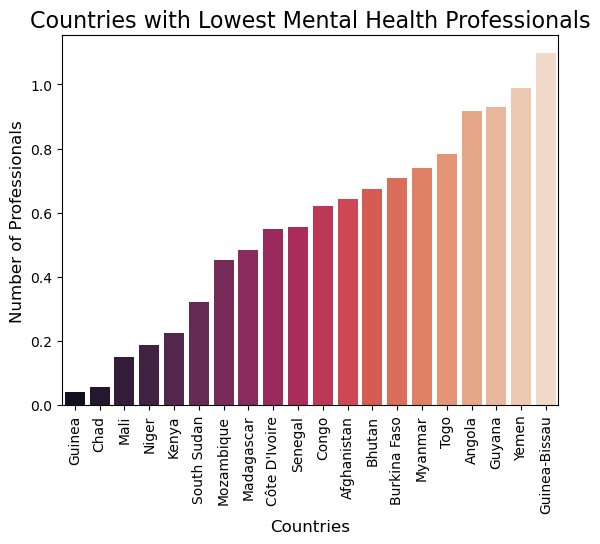

In [170]:
sns.barplot(data=bottom_20_professionals, x='Country', y='Total_Professionals', palette='rocket')
plt.title('Countries with Lowest Mental Health Professionals', fontsize=16)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of Professionals', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('Countries with Lowest Mental Health Professionals.jpg', dpi=300, bbox_inches='tight')

#lt.tight_layout()
plt.show()

In [ ]:
top_20_facilities = df_help.sort_values(by='Total_Facilities', ascending=False).head(20)
bottom_20_facilities = df_help.sort_values(by='Total_Facilities', ascending=True).head(20)

In [173]:
top_20_facilities

Country  Year  Psychiatrists  Nurses  Social_workers  Psychologists  \
77    Saint Lucia  2016          0.564  50.788           0.564          0.020   
47          Japan  2016         11.867  83.805           8.328          3.037   
31        Estonia  2016         16.188  23.484           0.532          6.460   
78          Samoa  2016          1.548   1.548           1.548          0.020   
37        Grenada  2016          1.872   0.936           2.808          0.020   
43        Hungary  2016         11.079  33.739           0.019          2.484   
64          Nauru  2016          0.025   8.881           0.019          0.020   
57         Monaco  2016         31.326  83.536         102.592         53.515   
90    Timor-Leste  2016          0.081   1.370           1.612          0.081   
84       Slovenia  2016         11.953  36.727           1.976          9.302   
21   Cook Islands  2016          5.731  11.462          17.193         11.462   
52      Lithuania  2016         18.452  49.763           0.019         15.860   
9          Belize  2016          1.392   3.340           0.019          1.113   
32           Fiji  2016          0.224   1.457           0.560          0.560   
24        Croatia  2016         11.095  41.856           1.298          4.367   
4       Argentina  2016         21.705   0.000           0.019        222.572   
10         Bhutan  2016          0.508   0.127           0.019          0.020   
72         Poland  2016         24.176  30.916           0.019         16.346   
35          Ghana  2016          0.058   7.733           0.019          0.065   
100       Vanuatu  2016          0.378   4.535           0.378          0.756   

     Mental_hospitals  health_units  outpatient_facilities  \
77              0.564         0.006                 19.751   
47              8.314         0.450                  7.223   
31              0.152         0.684                 14.820   
78              0.516         0.516                 12.387   
37              0.936         0.936                 10.297   
43              0.011         2.647                  8.269   
64              0.011         0.006                  8.881   
57              0.011         2.610                  5.221   
90              0.011         0.081                  6.527   
84              0.241         0.048                  5.832   
21              0.011         0.006                  5.731   
52              0.136         0.682                  3.922   
9               0.011         1.948                  2.227   
32              0.112         0.336                  3.363   
24              0.165         0.519                  3.093   
4               0.937         1.071                  1.720   
10              0.011         0.127                  3.556   
72              0.125         0.261                  3.207   
35              0.011         1.095                  2.378   
100             0.011         0.756                  2.645   

     Total_Professionals  Total_Facilities  
77                51.936            20.321  
47               107.037            15.987  
31                46.664            15.656  
78                 4.664            13.419  
37                 5.636            12.169  
43                47.321            10.927  
64                 8.945             8.898  
57               270.969             7.842  
90                 3.144             6.619  
84                59.958             6.121  
21                45.848             5.748  
52                84.094             4.740  
9                  5.864             4.186  
32                 2.801             3.811  
24                58.616             3.777  
4                244.296             3.728  
10                 0.674             3.694  
72                71.457             3.593  
35                 7.875             3.484  
100                6.047             3.412

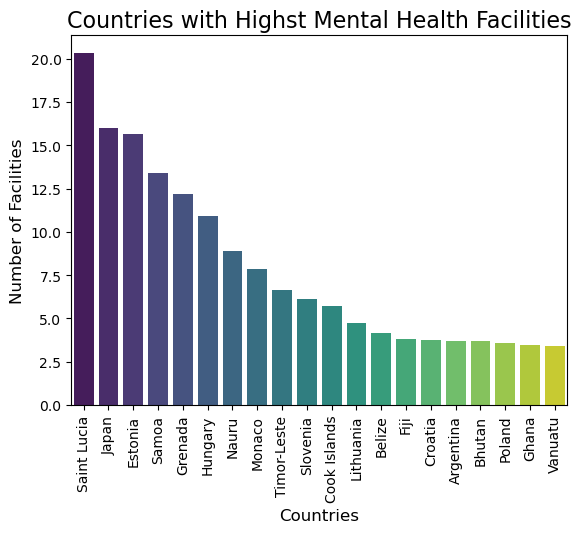

In [175]:
sns.barplot(data=top_20_facilities, x='Country', y='Total_Facilities', palette='viridis')
plt.title('Countries with Highst Mental Health Facilities', fontsize=16)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of Facilities', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('Countries with Highst Mental Health Facilities.jpg', dpi=300, bbox_inches='tight')

#lt.tight_layout()
plt.show()

In [176]:
bottom_20_facilities

Country  Year  Psychiatrists  Nurses  \
0                         Afghanistan  2016          0.231   0.098   
17                               Chad  2016          0.007   0.021   
86                        South Sudan  2016          0.025   0.017   
23                      Côte D'Ivoire  2016          0.130   0.381   
28                              Egypt  2016          1.600   4.799   
2                              Angola  2016          0.057   0.660   
55                               Mali  2016          0.029   0.092   
39                             Guinea  2016          0.025   0.000   
20                              Congo  2016          0.080   0.500   
81                            Senegal  2016          0.200   0.267   
7                          Bangladesh  2016          0.130   0.873   
11   Bolivia (Plurinational State Of)  2016          1.128   0.000   
49                              Kenya  2016          0.184   0.000   
53                         Madagascar  2016          0.058   0.314   
103                          Zimbabwe  2016          0.095   3.486   
33                              Gabon  2016          0.259   0.518   
40                      Guinea-Bissau  2016          0.025   0.791   
62                            Myanmar  2016          0.384   0.321   
101                             Yemen  2016          0.201   0.323   
42                              Haiti  2016          0.075   0.233   

     Social_workers  Psychologists  Mental_hospitals  health_units  \
0             0.019          0.296             0.003         0.012   
17            0.007          0.020             0.011         0.007   
86            0.019          0.261             0.011         0.008   
23            0.019          0.020             0.009         0.013   
28            0.448          0.256             0.019         0.006   
2             0.022          0.179             0.011         0.006   
55            0.019          0.011             0.011         0.006   
39            0.008          0.008             0.011         0.008   
20            0.020          0.020             0.011         0.040   
81            0.067          0.020             0.007         0.027   
7             0.019          0.124             0.001         0.035   
11            0.019          0.020             0.075         0.009   
49            0.019          0.020             0.002         0.032   
53            0.050          0.062             0.021         0.045   
103           0.634          0.057             0.025         0.025   
33            0.104          0.777             0.052         0.006   
40            0.169          0.113             0.056         0.006   
62            0.013          0.020             0.004         0.042   
101           0.056          0.409             0.033         0.026   
42            0.373          0.560             0.019         0.009   

     outpatient_facilities  Total_Professionals  Total_Facilities  
0                    0.006                0.644             0.021  
17                   0.007                0.055             0.025  
86                   0.008                0.322             0.027  
23                   0.017                0.550             0.039  
28                   0.031                7.103             0.056  
2                    0.040                0.918             0.057  
55                   0.040                0.151             0.057  
39                   0.040                0.041             0.059  
20                   0.020                0.620             0.071  
81                   0.040                0.554             0.074  
7                    0.055                1.146             0.091  
11                   0.009                1.167             0.093  
49                   0.068                0.223             0.102  
53                   0.040                0.484             0.106  
103                  0.057                4.272             0.107  


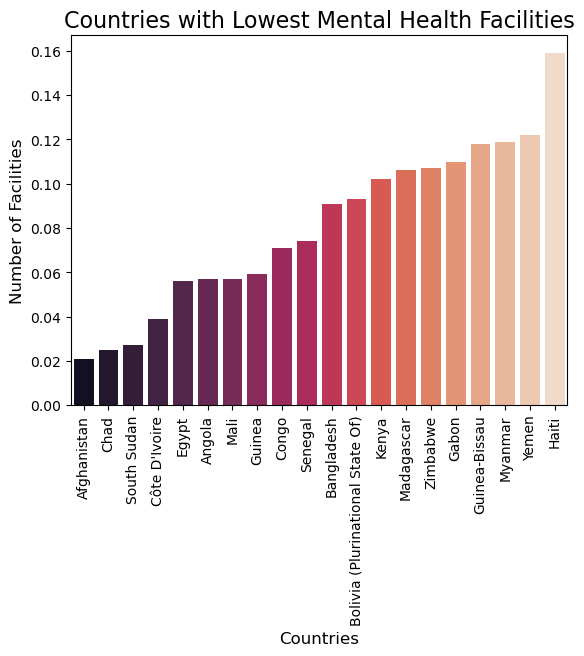

In [178]:
sns.barplot(data=bottom_20_facilities, x='Country', y='Total_Facilities', palette='rocket')
plt.title('Countries with Lowest Mental Health Facilities', fontsize=16)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of Facilities', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('Countries with Lowest Mental Health Facilities.jpg', dpi=300, bbox_inches='tight')

#lt.tight_layout()
plt.show()